# Chapter 9: Unsupervised Learning Techniques

**Source:** Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (2nd Edition) by Aurélien Géron

---

## 📚 Chapter Overview

This notebook provides a comprehensive implementation and exploration of unsupervised learning techniques covered in Chapter 9. Unsupervised learning involves training models on unlabeled data, discovering hidden patterns and structures without explicit target variables.

### Key Topics Covered:

#### 1. **Clustering Algorithms**
- **K-Means Clustering**
  - Algorithm fundamentals and initialization strategies (K-Means++)
  - Hard vs Soft clustering
  - Computational complexity: O(kmn) per iteration
  - Finding optimal k using Elbow Method and Silhouette Analysis
  - Limitations and practical considerations

- **DBSCAN (Density-Based Spatial Clustering)**
  - Density-based approach for arbitrary-shaped clusters
  - Core, border, and anomaly instances
  - Handling varying densities and outliers

#### 2. **Gaussian Mixture Models (GMM)**
- Probabilistic clustering using mixture of Gaussians
- Expectation-Maximization (EM) algorithm
- Covariance matrix types: full, tied, diagonal, spherical
- Model selection using BIC and AIC
- Bayesian Gaussian Mixture for automatic cluster selection

#### 3. **Practical Applications**
- **Customer Segmentation**: Grouping similar customers for targeted marketing
- **Data Analysis**: Exploratory data analysis and pattern discovery
- **Dimensionality Reduction**: Feature extraction using cluster distances
- **Anomaly Detection**: Identifying outliers and unusual patterns
- **Semi-Supervised Learning**: Label propagation techniques
- **Image Segmentation**: Color-based clustering

#### 4. **Advanced Concepts**
- Voronoi tessellation and decision boundaries
- Inertia and within-cluster sum of squares
- Silhouette coefficient for cluster quality
- Density estimation and generative modeling

---

## 🎯 Learning Objectives

By the end of this notebook, you will be able to:

1. ✅ Implement and optimize K-Means clustering for various datasets
2. ✅ Apply DBSCAN for density-based clustering with arbitrary shapes
3. ✅ Utilize Gaussian Mixture Models for probabilistic clustering
4. ✅ Perform model selection using information criteria (BIC/AIC)
5. ✅ Apply clustering for preprocessing and semi-supervised learning
6. ✅ Detect anomalies using clustering-based approaches
7. ✅ Visualize and interpret clustering results effectively

---

## 📊 Datasets Used

This chapter utilizes several datasets:

1. **Synthetic Blob Data** (`sklearn.datasets.make_blobs`)
   - Purpose: Demonstrating K-Means fundamentals
   - Features: Well-separated Gaussian clusters

2. **Moons Dataset** (`sklearn.datasets.make_moons`)
   - Purpose: Showing K-Means limitations and DBSCAN advantages
   - Features: Non-linearly separable clusters

3. **Digits Dataset** (`sklearn.datasets.load_digits`)
   - Purpose: Preprocessing for classification, semi-supervised learning
   - Features: 8x8 pixel handwritten digits (0-9)
   - Samples: 1,797 instances

4. **Olivetti Faces** (`sklearn.datasets.fetch_olivetti_faces`)
   - Purpose: Exercise applications
   - Features: 64x64 grayscale face images
   - Samples: 400 images of 40 people

5. **Custom Image Data**
   - Purpose: Image segmentation demonstrations
   - Features: Real-world images for color-based clustering

---

## 🔧 Technical Requirements

### Python Version
- Python 3.8+

### Core Libraries
- **NumPy**: Numerical computing
- **Pandas**: Data manipulation
- **Matplotlib**: Visualization
- **Seaborn**: Statistical visualization
- **Scikit-learn**: Machine learning algorithms
- **SciPy**: Scientific computing

### Optional Libraries
- **Pillow (PIL)**: Image processing
- **imageio**: Image I/O operations

---

## 📝 Note on Reproducibility

All random processes in this notebook use fixed random seeds to ensure reproducible results. This is critical for:
- Academic integrity and verification
- Debugging and troubleshooting
- Consistent results across different runs

**Random Seed**: `42` (used throughout the notebook)

---

## 🚀 Getting Started

Execute the cells sequentially from top to bottom. Each section builds upon previous concepts, so maintaining order is important for proper understanding and execution.

---


## Part 1: Environment Setup

### 1.1 Check Python Environment & Install Dependencies

Before proceeding, ensure you have all required packages installed. This cell checks your Python version and verifies that essential libraries are available.

In [195]:
# Check Python version
import sys
print(f"Python version: {sys.version}")
print(f"Python executable: {sys.executable}")

# Verify we're using Python 3.8+
assert sys.version_info >= (3, 8), "This notebook requires Python 3.8 or higher"
print("✅ Python version check passed!")

Python version: 3.10.19 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 16:41:31) [MSC v.1929 64 bit (AMD64)]
Python executable: c:\ProgramData\anaconda3\envs\fraud_ml\python.exe
✅ Python version check passed!


In [196]:
# Install required packages (uncomment if needed)
# Biasanya sudah terinstall jika menggunakan Anaconda/Miniconda

# !pip install numpy pandas matplotlib seaborn scikit-learn scipy pillow imageio --upgrade

# Untuk environment yang fresh, uncomment command di atas
print("📦 Installation cell ready. Uncomment if packages need to be installed.")

📦 Installation cell ready. Uncomment if packages need to be installed.


### 1.2 Import Core Libraries

Import all necessary libraries with proper aliasing conventions. We organize imports into logical groups for better readability and maintenance.

In [197]:
# ============================================================================
# CORE SCIENTIFIC COMPUTING LIBRARIES
# ============================================================================

import numpy as np
import pandas as pd
from scipy import stats

# ============================================================================
# VISUALIZATION LIBRARIES
# ============================================================================

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse
from matplotlib.colors import LogNorm
import seaborn as sns

# Set plotting style for professional visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# MACHINE LEARNING - SCIKIT-LEARN
# ============================================================================

# Clustering Algorithms
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

# Dataset Utilities
from sklearn.datasets import (
    make_blobs, 
    make_moons, 
    load_digits,
    fetch_olivetti_faces
)

# Preprocessing & Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Model Selection & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    silhouette_score, 
    silhouette_samples,
    accuracy_score,
    classification_report
)

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Classification (for semi-supervised learning)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# ============================================================================
# IMAGE PROCESSING (Optional - for image segmentation)
# ============================================================================

try:
    from PIL import Image
    import imageio.v2 as imageio
    IMAGE_PROCESSING_AVAILABLE = True
    print("✅ Image processing libraries loaded successfully")
except ImportError:
    IMAGE_PROCESSING_AVAILABLE = False
    print("⚠️  Image processing libraries not available. Install with: pip install pillow imageio")

# ============================================================================
# UTILITY LIBRARIES
# ============================================================================

import warnings
import time
from pathlib import Path

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

print("="*80)
print("✅ All core libraries imported successfully!")
print("="*80)

✅ Image processing libraries loaded successfully
✅ All core libraries imported successfully!


### 1.3 Verify Library Versions

Display versions of key libraries to ensure compatibility and reproducibility. This is important for debugging and ensuring that results can be replicated in different environments.

In [198]:
# Display library versions
import sklearn
import scipy

print("📚 Library Versions:")
print("="*80)
print(f"NumPy version       : {np.__version__}")
print(f"Pandas version      : {pd.__version__}")
print(f"Matplotlib version  : {mpl.__version__}")
print(f"Seaborn version     : {sns.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"SciPy version       : {scipy.__version__}")
print("="*80)

# Verify scikit-learn version (should be 0.20+)
sklearn_version = tuple(map(int, sklearn.__version__.split('.')[:2]))
if sklearn_version < (0, 20):
    print("⚠️  Warning: Scikit-learn version is older than 0.20. Some features may not work.")
else:
    print("✅ Scikit-learn version is compatible!")

📚 Library Versions:
NumPy version       : 1.26.4
Pandas version      : 2.3.3
Matplotlib version  : 3.10.8
Seaborn version     : 0.13.2
Scikit-learn version: 1.7.2
SciPy version       : 1.15.2
✅ Scikit-learn version is compatible!


### 1.4 Global Configuration & Settings

Set up global configurations for reproducibility, visualization, and numerical computations. These settings ensure consistent behavior across different environments and runs.

In [199]:
# ============================================================================
# REPRODUCIBILITY SETTINGS
# ============================================================================

# Global random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print(f"🎲 Random seed set to: {RANDOM_SEED}")

# ============================================================================
# MATPLOTLIB CONFIGURATION
# ============================================================================

# Figure settings for high-quality output
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# Font settings for better readability
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Grid and spine settings
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

print("✅ Matplotlib configuration set")

# ============================================================================
# PANDAS DISPLAY SETTINGS
# ============================================================================

# Display settings for better DataFrame visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 4)
pd.set_option('display.float_format', '{:.4f}'.format)

print("✅ Pandas display options configured")

# ============================================================================
# NUMPY PRINT OPTIONS
# ============================================================================

# NumPy print settings for cleaner array output
np.set_printoptions(precision=4, suppress=True, linewidth=100)

print("✅ NumPy print options configured")

print("="*80)
print("🎨 Global configuration completed successfully!")
print("="*80)

🎲 Random seed set to: 42
✅ Matplotlib configuration set
✅ Pandas display options configured
✅ NumPy print options configured
🎨 Global configuration completed successfully!


### 1.5 Helper Functions & Utilities

Define reusable utility functions that will be used throughout the notebook. These functions encapsulate common operations for visualization, data processing, and evaluation.

In [200]:
# ============================================================================
# VISUALIZATION HELPER FUNCTIONS
# ============================================================================

def plot_clusters(X, y=None, centroids=None, title="Cluster Visualization", 
                  figsize=(10, 6), alpha=0.6, s=50):
    """
    Visualize clustered data with optional centroids.
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        Data points to plot (only first 2 dimensions used)
    y : array-like, shape (n_samples,), optional
        Cluster labels for coloring points
    centroids : array-like, shape (n_clusters, n_features), optional
        Cluster centroids to display
    title : str
        Plot title
    figsize : tuple
        Figure size
    alpha : float
        Transparency of points
    s : float
        Size of points
    """
    plt.figure(figsize=figsize)
    
    if y is not None:
        # Color points by cluster label
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=s, alpha=alpha, 
                            cmap='viridis', edgecolors='k', linewidth=0.5)
        plt.colorbar(scatter, label='Cluster Label')
    else:
        # Plot without cluster labels
        plt.scatter(X[:, 0], X[:, 1], s=s, alpha=alpha, 
                   edgecolors='k', linewidth=0.5)
    
    if centroids is not None:
        # Plot centroids with distinct markers
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                   s=300, c='red', marker='X', 
                   edgecolors='black', linewidth=2,
                   label='Centroids', zorder=10)
        plt.legend()
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.tight_layout()
    plt.show()


def plot_decision_boundaries(X, y, model, resolution=0.02, 
                            title="Decision Boundaries", figsize=(10, 6)):
    """
    Plot decision boundaries for clustering models.
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, 2)
        2D data points
    y : array-like, shape (n_samples,)
        Cluster labels
    model : clustering model
        Trained clustering model with predict method
    resolution : float
        Grid resolution for decision boundary
    title : str
        Plot title
    figsize : tuple
        Figure size
    """
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Predict on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, alpha=0.8, 
               cmap='viridis', edgecolors='k', linewidth=0.5)
    
    if hasattr(model, 'cluster_centers_'):
        centroids = model.cluster_centers_
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                   s=300, c='red', marker='X',
                   edgecolors='black', linewidth=2,
                   label='Centroids', zorder=10)
        plt.legend()
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.tight_layout()
    plt.show()

print("✅ Visualization functions (1/2) defined: plot_clusters(), plot_decision_boundaries()")

✅ Visualization functions (1/2) defined: plot_clusters(), plot_decision_boundaries()


In [201]:
def plot_silhouette_diagram(X, y, n_clusters, metric='euclidean'):
    """
    Plot silhouette diagram for cluster analysis.
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        Data points
    y : array-like, shape (n_samples,)
        Cluster labels
    n_clusters : int
        Number of clusters
    metric : str
        Distance metric for silhouette calculation
    """
    silhouette_avg = silhouette_score(X, y, metric=metric)
    sample_silhouette_values = silhouette_samples(X, y, metric=metric)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate silhouette scores for samples in cluster i
        cluster_silhouette_values = sample_silhouette_values[y == i]
        cluster_silhouette_values.sort()
        
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label clusters
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),
               fontsize=12, fontweight='bold')
        
        y_lower = y_upper + 10
    
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster Label')
    ax.set_title(f'Silhouette Diagram (n_clusters={n_clusters}, avg={silhouette_avg:.3f})')
    
    # Vertical line for average silhouette score
    ax.axvline(x=silhouette_avg, color='red', linestyle='--', 
              linewidth=2, label=f'Average: {silhouette_avg:.3f}')
    
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    ax.legend()
    plt.tight_layout()
    plt.show()

print("✅ Visualization functions (2/2) defined: plot_silhouette_diagram()")

✅ Visualization functions (2/2) defined: plot_silhouette_diagram()


In [202]:
# ============================================================================
# DATA PROCESSING HELPER FUNCTIONS
# ============================================================================

def generate_blob_data(n_samples=1000, n_features=2, centers=3, 
                       cluster_std=0.5, random_state=RANDOM_SEED):
    """
    Generate synthetic blob data for clustering demonstrations.
    
    Parameters:
    -----------
    n_samples : int
        Total number of samples
    n_features : int
        Number of features
    centers : int or array-like
        Number of centers or center coordinates
    cluster_std : float
        Standard deviation of clusters
    random_state : int
        Random seed
        
    Returns:
    --------
    X : array, shape (n_samples, n_features)
        Generated data
    y : array, shape (n_samples,)
        True cluster labels
    """
    X, y = make_blobs(n_samples=n_samples, 
                      n_features=n_features,
                      centers=centers,
                      cluster_std=cluster_std,
                      random_state=random_state)
    return X, y


def evaluate_clustering(X, labels, metric='euclidean'):
    """
    Evaluate clustering quality using multiple metrics.
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        Data points
    labels : array-like, shape (n_samples,)
        Cluster labels
    metric : str
        Distance metric
        
    Returns:
    --------
    dict : Dictionary containing evaluation metrics
    """
    # Remove noise points (label = -1) for silhouette calculation
    mask = labels != -1
    
    if mask.sum() < 2:
        return {'silhouette_score': None, 'n_clusters': 0, 'n_noise': (~mask).sum()}
    
    n_clusters = len(set(labels[mask]))
    n_noise = (~mask).sum()
    
    if n_clusters < 2:
        silhouette_avg = None
    else:
        silhouette_avg = silhouette_score(X[mask], labels[mask], metric=metric)
    
    return {
        'silhouette_score': silhouette_avg,
        'n_clusters': n_clusters,
        'n_noise': n_noise
    }


def print_metrics(metrics_dict, title="Clustering Metrics"):
    """
    Pretty print clustering metrics.
    
    Parameters:
    -----------
    metrics_dict : dict
        Dictionary containing metrics
    title : str
        Title for the metrics display
    """
    print("\n" + "="*60)
    print(f"  {title}")
    print("="*60)
    
    for key, value in metrics_dict.items():
        if value is None:
            print(f"{key:.<40} N/A")
        elif isinstance(value, float):
            print(f"{key:.<40} {value:.4f}")
        else:
            print(f"{key:.<40} {value}")
    
    print("="*60 + "\n")


print("="*80)
print("✅ All helper functions defined successfully!")
print("="*80)
print("\n📚 Available helper functions:")
print("  • plot_clusters() - Visualize clustered data")
print("  • plot_decision_boundaries() - Plot clustering decision boundaries")
print("  • plot_silhouette_diagram() - Create silhouette analysis plot")
print("  • generate_blob_data() - Generate synthetic clustering data")
print("  • evaluate_clustering() - Calculate clustering quality metrics")
print("  • print_metrics() - Display metrics in formatted output")
print("="*80)

✅ All helper functions defined successfully!

📚 Available helper functions:
  • plot_clusters() - Visualize clustered data
  • plot_decision_boundaries() - Plot clustering decision boundaries
  • plot_silhouette_diagram() - Create silhouette analysis plot
  • generate_blob_data() - Generate synthetic clustering data
  • evaluate_clustering() - Calculate clustering quality metrics
  • print_metrics() - Display metrics in formatted output


### 1.6 Quick Test: Verify Helper Functions

Let's do a quick test to verify that all helper functions work correctly by generating sample data and creating visualizations.

🧪 Testing helper functions with sample data...
✅ Generated test data: 300 samples, 2 features
✅ Number of true clusters: 3

📊 Test 1: Visualizing raw clustered data...


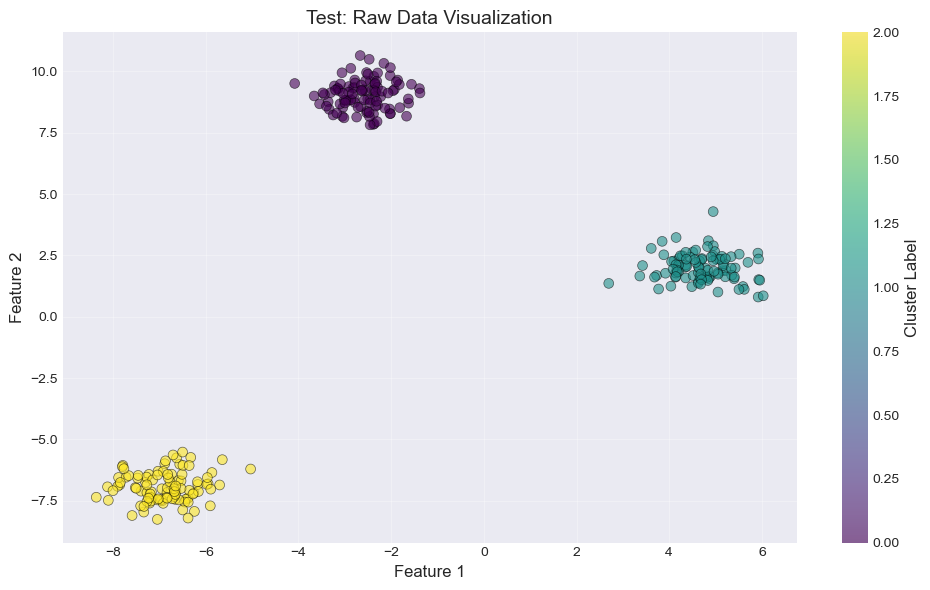


📊 Test 2: K-Means clustering with centroids...


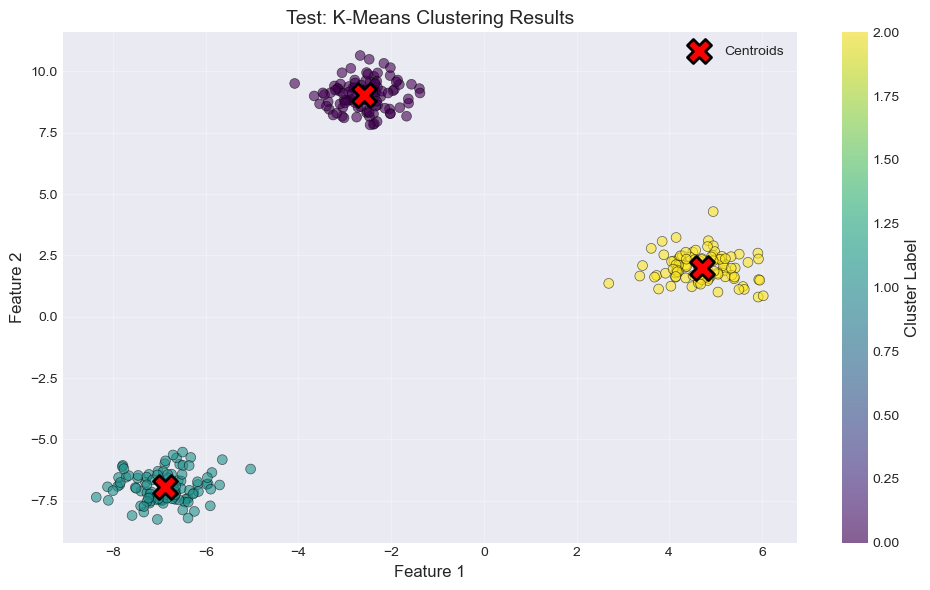


📊 Test 3: Decision boundaries visualization...


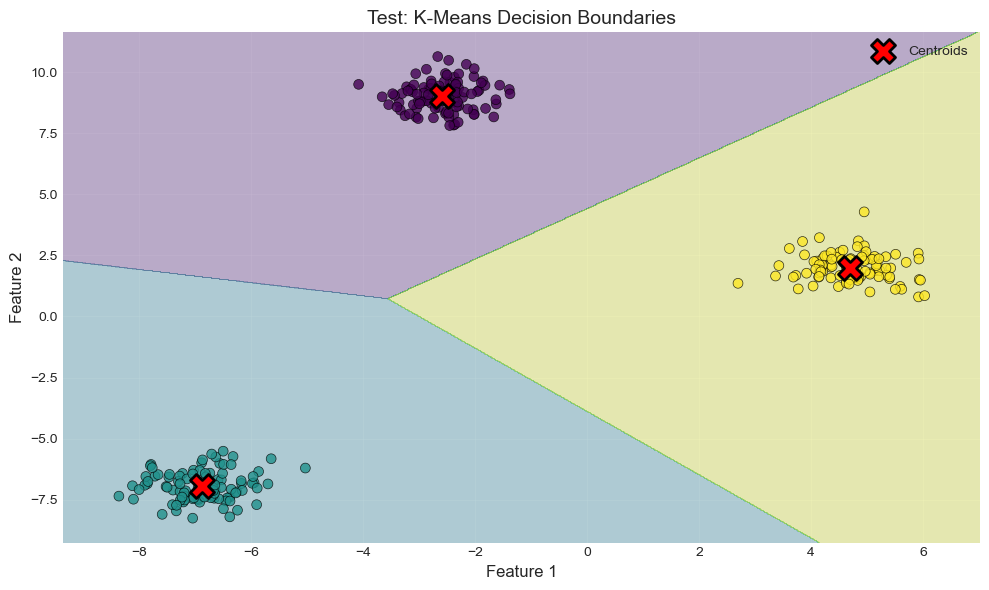


📊 Test 4: Silhouette analysis...


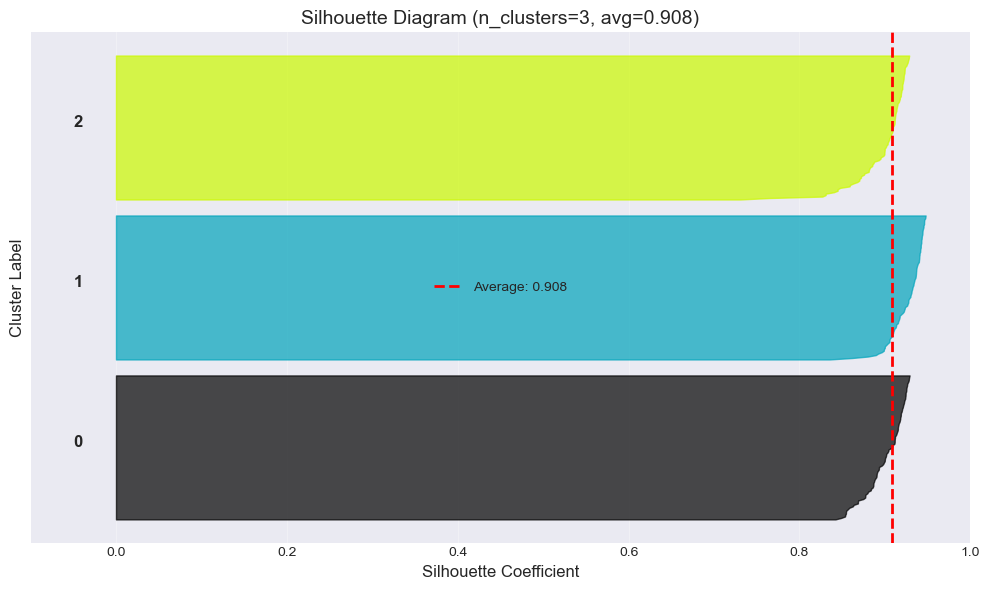


📊 Test 5: Clustering evaluation metrics...

  Test Clustering Performance
silhouette_score........................ 0.9084
n_clusters.............................. 3
n_noise................................. 0

✅ All helper functions tested successfully!


In [203]:
# Generate sample data for testing
print("🧪 Testing helper functions with sample data...")
print("="*80)

# Generate synthetic blob data
X_test, y_test = generate_blob_data(n_samples=300, centers=3, cluster_std=0.6)

print(f"✅ Generated test data: {X_test.shape[0]} samples, {X_test.shape[1]} features")
print(f"✅ Number of true clusters: {len(np.unique(y_test))}")

# Test 1: Plot clusters without model
print("\n📊 Test 1: Visualizing raw clustered data...")
plot_clusters(X_test, y_test, title="Test: Raw Data Visualization")

# Test 2: Fit K-Means and visualize with centroids
print("\n📊 Test 2: K-Means clustering with centroids...")
kmeans_test = KMeans(n_clusters=3, random_state=RANDOM_SEED, n_init=10)
kmeans_test.fit(X_test)
plot_clusters(X_test, kmeans_test.labels_, kmeans_test.cluster_centers_, 
              title="Test: K-Means Clustering Results")

# Test 3: Plot decision boundaries
print("\n📊 Test 3: Decision boundaries visualization...")
plot_decision_boundaries(X_test, kmeans_test.labels_, kmeans_test, 
                        title="Test: K-Means Decision Boundaries")

# Test 4: Silhouette diagram
print("\n📊 Test 4: Silhouette analysis...")
plot_silhouette_diagram(X_test, kmeans_test.labels_, n_clusters=3)

# Test 5: Evaluate clustering
print("\n📊 Test 5: Clustering evaluation metrics...")
metrics = evaluate_clustering(X_test, kmeans_test.labels_)
print_metrics(metrics, title="Test Clustering Performance")

print("="*80)
print("✅ All helper functions tested successfully!")
print("="*80)

---

# Part 2: K-Means Clustering

## 📚 Introduction to K-Means

K-Means is one of the most popular and widely-used clustering algorithms. It partitions data into K distinct, non-overlapping clusters by iteratively assigning each data point to the nearest cluster centroid and then updating the centroids based on the mean of assigned points.

### Key Concepts:

#### **Algorithm Overview:**
1. **Initialization**: Randomly select K initial centroids (or use K-Means++)
2. **Assignment Step**: Assign each data point to the nearest centroid
3. **Update Step**: Recalculate centroids as the mean of all points in each cluster
4. **Iteration**: Repeat steps 2-3 until convergence (centroids no longer move significantly)

#### **Mathematical Foundation:**

**Objective Function (Inertia):**
$$\text{Inertia} = \sum_{i=1}^{n} \min_{\mu_j \in C} ||x_i - \mu_j||^2$$

Where:
- $x_i$ = data point i
- $\mu_j$ = centroid of cluster j
- $C$ = set of all centroids

The algorithm minimizes the within-cluster sum of squares (WCSS).

#### **Computational Complexity:**
- **Best/Average case**: O(k × m × n × i)
  - k = number of clusters
  - m = number of features
  - n = number of samples
  - i = number of iterations
- **Worst case**: O(m × n²) (rarely occurs)

#### **Advantages:**
✅ Simple and easy to implement
✅ Fast and efficient for large datasets
✅ Scales well with number of samples
✅ Guaranteed to converge

#### **Limitations:**
❌ Requires specifying K in advance
❌ Sensitive to initial centroid placement
❌ Assumes spherical clusters of similar size
❌ Sensitive to outliers
❌ May converge to local optima

---

## 2.1 Basic K-Means Implementation

Let's start with a basic implementation to understand how K-Means works.

In [204]:
# ============================================================================
# GENERATE SYNTHETIC DATA FOR K-MEANS DEMONSTRATION
# ============================================================================

print("🎲 Generating synthetic blob data for K-Means demonstration...")
print("="*80)

# Generate well-separated blobs
X_blob, y_blob_true = make_blobs(
    n_samples=1500,      # Total number of samples
    n_features=2,        # 2D for easy visualization
    centers=5,           # True number of clusters
    cluster_std=0.6,     # Standard deviation of clusters
    random_state=RANDOM_SEED
)

print(f"✅ Dataset created successfully!")
print(f"   • Total samples: {X_blob.shape[0]}")
print(f"   • Features: {X_blob.shape[1]}")
print(f"   • True number of clusters: {len(np.unique(y_blob_true))}")
print(f"   • Data shape: {X_blob.shape}")
print(f"   • Data range: X1=[{X_blob[:, 0].min():.2f}, {X_blob[:, 0].max():.2f}], "
      f"X2=[{X_blob[:, 1].min():.2f}, {X_blob[:, 1].max():.2f}]")

# Display sample of the data
print("\n📊 Sample of generated data (first 5 points):")
print(X_blob[:5])

print("="*80)

🎲 Generating synthetic blob data for K-Means demonstration...
✅ Dataset created successfully!
   • Total samples: 1500
   • Features: 2
   • True number of clusters: 5
   • Data shape: (1500, 2)
   • Data range: X1=[-10.65, 6.18], X2=[-8.63, 11.33]

📊 Sample of generated data (first 5 points):
[[ 4.8215  1.5206]
 [ 2.3114  4.4898]
 [-8.465   6.6402]
 [ 4.7649  0.7481]
 [-6.5318 -6.6846]]


📊 Visualizing raw data distribution...


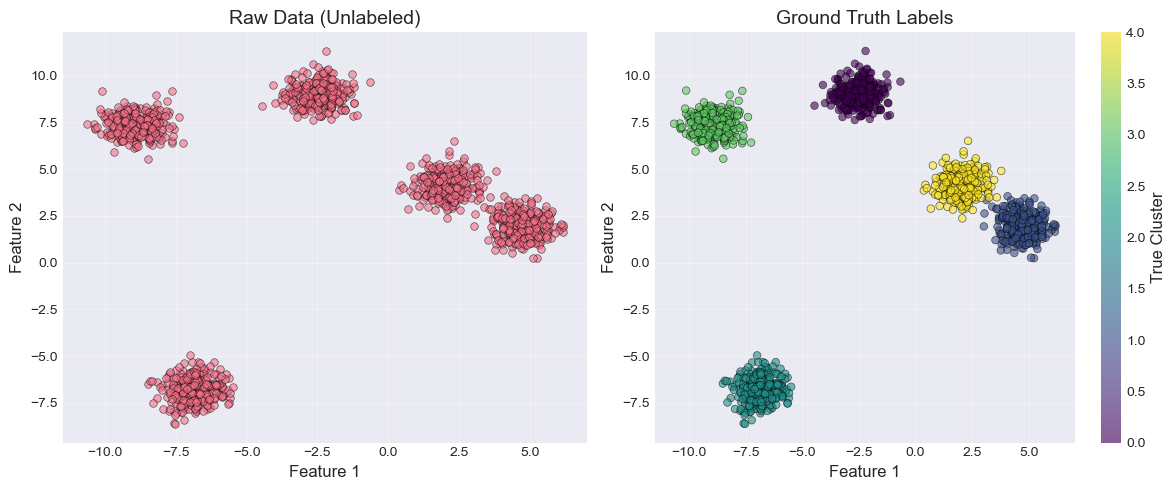

✅ Data visualization complete!


In [205]:
# ============================================================================
# VISUALIZE RAW DATA (WITHOUT CLUSTERING)
# ============================================================================

print("📊 Visualizing raw data distribution...")

plt.figure(figsize=(12, 5))

# Plot 1: Data without true labels (as we would see it initially)
plt.subplot(1, 2, 1)
plt.scatter(X_blob[:, 0], X_blob[:, 1], s=30, alpha=0.6, edgecolors='k', linewidth=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Raw Data (Unlabeled)')
plt.grid(True, alpha=0.3)

# Plot 2: Data with true labels (ground truth for comparison)
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob_true, s=30, 
                     alpha=0.6, cmap='viridis', edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='True Cluster')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Ground Truth Labels')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Data visualization complete!")

## 2.2 Fitting K-Means Model

Now let's fit a K-Means model to our data. We'll use `k=5` since we know the true number of clusters.

### Important Parameters:
- **n_clusters**: Number of clusters to form (K)
- **init**: Initialization method
  - `'k-means++'` (default): Smart initialization that spreads initial centroids
  - `'random'`: Random initialization
- **n_init**: Number of times to run with different initializations (picks best result)
- **max_iter**: Maximum iterations for convergence
- **random_state**: Random seed for reproducibility

In [206]:
# ============================================================================
# FIT K-MEANS MODEL
# ============================================================================

print("🔧 Fitting K-Means model...")
print("="*80)

# Create and fit K-Means model
kmeans = KMeans(
    n_clusters=5,           # We know true K = 5
    init='k-means++',       # Smart initialization
    n_init=10,              # Run 10 times, pick best
    max_iter=300,           # Maximum iterations
    random_state=RANDOM_SEED
)

# Fit the model
start_time = time.time()
kmeans.fit(X_blob)
training_time = time.time() - start_time

print(f"✅ K-Means training completed!")
print(f"   • Training time: {training_time:.4f} seconds")
print(f"   • Number of iterations: {kmeans.n_iter_}")
print(f"   • Final inertia (WCSS): {kmeans.inertia_:.2f}")

# Get cluster assignments
y_kmeans = kmeans.labels_
centroids = kmeans.cluster_centers_

print(f"\n📊 Clustering Results:")
print(f"   • Cluster centers shape: {centroids.shape}")
print(f"   • Unique clusters found: {len(np.unique(y_kmeans))}")

# Display cluster sizes
unique, counts = np.unique(y_kmeans, return_counts=True)
print(f"\n📈 Cluster size distribution:")
for cluster_id, count in zip(unique, counts):
    print(f"   • Cluster {cluster_id}: {count} samples ({count/len(y_kmeans)*100:.1f}%)")

print("\n🎯 Cluster Centroids:")
print(centroids)

print("="*80)

🔧 Fitting K-Means model...
✅ K-Means training completed!
   • Training time: 0.0146 seconds
   • Number of iterations: 2
   • Final inertia (WCSS): 1048.18

📊 Clustering Results:
   • Cluster centers shape: (5, 2)
   • Unique clusters found: 5

📈 Cluster size distribution:
   • Cluster 0: 301 samples (20.1%)
   • Cluster 1: 300 samples (20.0%)
   • Cluster 2: 300 samples (20.0%)
   • Cluster 3: 300 samples (20.0%)
   • Cluster 4: 299 samples (19.9%)

🎯 Cluster Centroids:
[[ 2.0562  4.1605]
 [-6.8643 -6.8189]
 [-8.8876  7.3596]
 [-2.5181  9.0028]
 [ 4.7062  2.0094]]


📊 Visualizing K-Means clustering results...


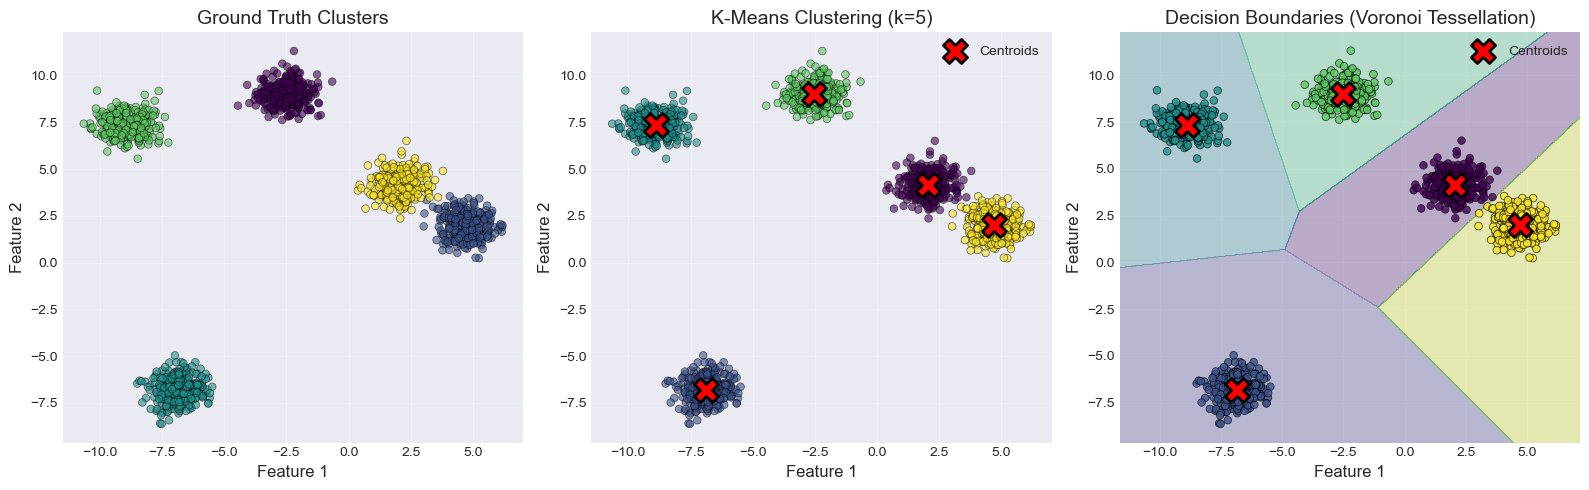

✅ Visualization complete!


In [207]:
# ============================================================================
# VISUALIZE K-MEANS CLUSTERING RESULTS
# ============================================================================

print("📊 Visualizing K-Means clustering results...")

plt.figure(figsize=(16, 5))

# Plot 1: Ground Truth
plt.subplot(1, 3, 1)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob_true, s=30, 
           alpha=0.6, cmap='viridis', edgecolors='k', linewidth=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Ground Truth Clusters')
plt.grid(True, alpha=0.3)

# Plot 2: K-Means Predictions
plt.subplot(1, 3, 2)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_kmeans, s=30, 
           alpha=0.6, cmap='viridis', edgecolors='k', linewidth=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], 
           s=300, c='red', marker='X', edgecolors='black', linewidth=2,
           label='Centroids', zorder=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering (k=5)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Decision Boundaries
plt.subplot(1, 3, 3)
# Create mesh for decision boundary
h = 0.02  # step size in mesh
x_min, x_max = X_blob[:, 0].min() - 1, X_blob[:, 0].max() + 1
y_min, y_max = X_blob[:, 1].min() - 1, X_blob[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_kmeans, s=30, 
           alpha=0.8, cmap='viridis', edgecolors='k', linewidth=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], 
           s=300, c='red', marker='X', edgecolors='black', linewidth=2,
           label='Centroids', zorder=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries (Voronoi Tessellation)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualization complete!")

## 2.3 Hard Clustering vs Soft Clustering

K-Means performs **hard clustering**, meaning each point is assigned to exactly one cluster. However, we can also examine how "confident" the algorithm is in these assignments using **soft clustering** (cluster distances).

### Hard Clustering:
- Each point belongs to exactly ONE cluster
- Uses `predict()` method
- Returns cluster labels (0, 1, 2, ..., k-1)

### Soft Clustering:
- Shows distance of each point to ALL centroids
- Uses `transform()` method
- Returns distance matrix of shape (n_samples, n_clusters)
- Useful for understanding cluster boundaries and uncertainty

🔍 Demonstrating soft clustering (distances to centroids)...
✅ Distance matrix computed!
   • Shape: (1500, 5)
   • Each row = one sample's distances to all 5 centroids

📊 Example: Distances for first 5 samples:
   (Lower distance = closer to centroid)

Sample | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3 | Cluster 4 | Assigned
-------------------------------------------------------------------------------------
   0   |      3.82 |     14.36 |     14.90 |     10.48 |      0.50 |    4
   1   |      0.42 |     14.56 |     11.56 |      6.61 |      3.45 |    0
   2   |     10.81 |     13.55 |      0.83 |      6.40 |     13.96 |    2
   3   |      4.36 |     13.87 |     15.17 |     11.01 |      1.26 |    4
   4   |     13.83 |      0.36 |     14.24 |     16.19 |     14.21 |    1

📊 Visualizing cluster confidence (distance to nearest centroid)...


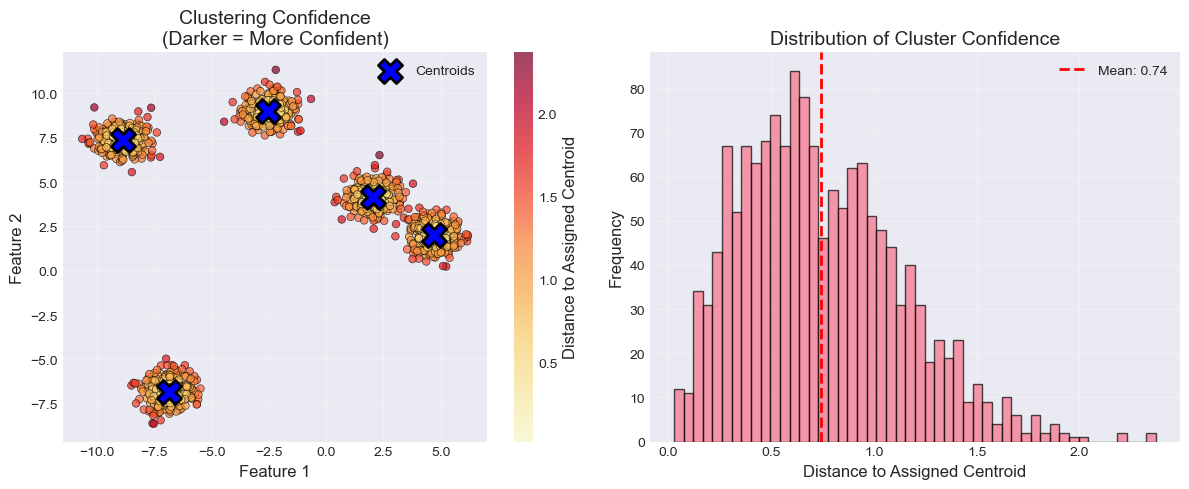

In [208]:
# ============================================================================
# SOFT CLUSTERING: DISTANCES TO ALL CENTROIDS
# ============================================================================

print("🔍 Demonstrating soft clustering (distances to centroids)...")
print("="*80)

# Get distances to all centroids
distances = kmeans.transform(X_blob)

print(f"✅ Distance matrix computed!")
print(f"   • Shape: {distances.shape}")
print(f"   • Each row = one sample's distances to all {kmeans.n_clusters} centroids")

# Show example for first 5 samples
print(f"\n📊 Example: Distances for first 5 samples:")
print("   (Lower distance = closer to centroid)")
print("\nSample | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3 | Cluster 4 | Assigned")
print("-" * 85)
for i in range(5):
    dist_str = " | ".join([f"{d:9.2f}" for d in distances[i]])
    print(f"  {i:2d}   | {dist_str} |    {y_kmeans[i]}")

# Visualize soft clustering confidence
print("\n📊 Visualizing cluster confidence (distance to nearest centroid)...")

# Calculate distance to assigned centroid (confidence measure)
assigned_distances = distances[np.arange(len(X_blob)), y_kmeans]

plt.figure(figsize=(12, 5))

# Plot 1: Cluster assignments colored by distance to centroid
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_blob[:, 0], X_blob[:, 1], c=assigned_distances, 
                     s=30, alpha=0.7, cmap='YlOrRd', edgecolors='k', linewidth=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], 
           s=300, c='blue', marker='X', edgecolors='black', linewidth=2,
           label='Centroids', zorder=10)
cbar = plt.colorbar(scatter, label='Distance to Assigned Centroid')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Confidence\n(Darker = More Confident)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Histogram of distances
plt.subplot(1, 2, 2)
plt.hist(assigned_distances, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Distance to Assigned Centroid')
plt.ylabel('Frequency')
plt.title('Distribution of Cluster Confidence')
plt.axvline(assigned_distances.mean(), color='red', linestyle='--', 
           linewidth=2, label=f'Mean: {assigned_distances.mean():.2f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("="*80)

## 2.4 K-Means Algorithm Iteration Visualization

Let's visualize how K-Means algorithm works step-by-step. We'll see how centroids move during each iteration until convergence.

### Algorithm Steps Visualized:
1. **Initialization**: Place K centroids randomly (or using K-Means++)
2. **Assignment**: Assign each point to nearest centroid
3. **Update**: Move centroids to mean of assigned points
4. **Repeat**: Continue until centroids stop moving (convergence)

This visualization helps understand:
- How quickly the algorithm converges
- Why initialization matters
- How centroids "migrate" to cluster centers

🎬 Creating K-Means iteration visualization...
   ✅ Converged at iteration 3
✅ K-Means completed in 3 iterations
   • Total centroid updates: 2


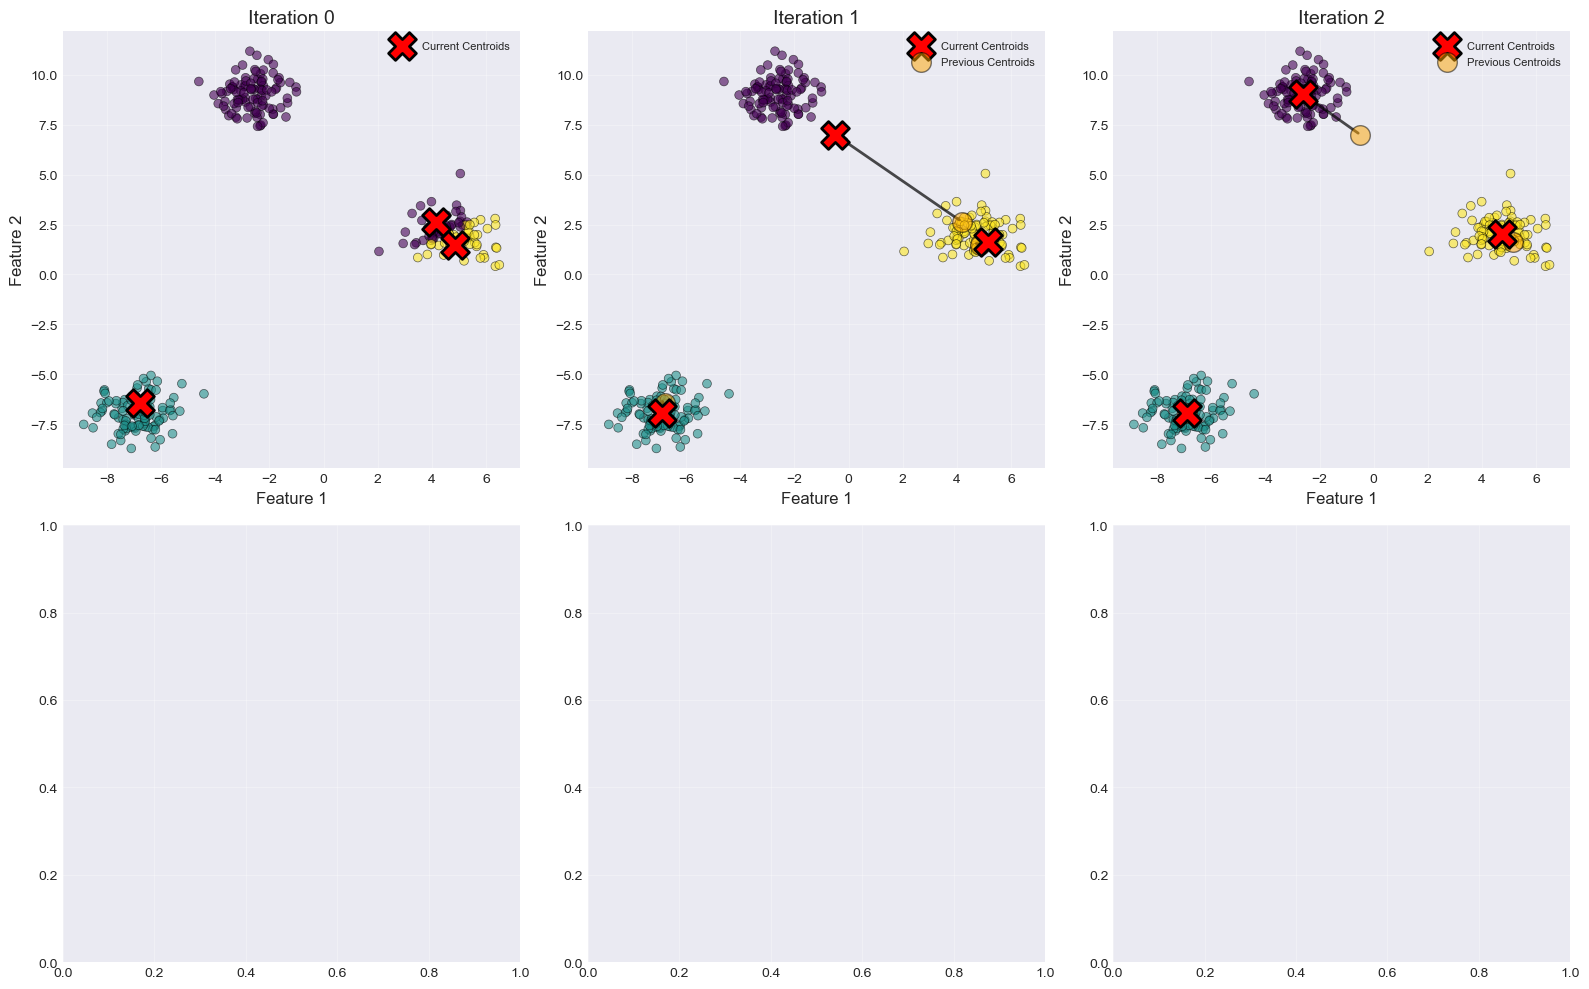

📊 Key Observations:
   • Centroids move towards cluster centers in each iteration
   • Movement becomes smaller as algorithm approaches convergence
   • Cluster assignments stabilize over iterations


In [209]:
# ============================================================================
# VISUALIZE K-MEANS ALGORITHM STEP-BY-STEP
# ============================================================================

print("🎬 Creating K-Means iteration visualization...")
print("="*80)

# Generate smaller dataset for clearer visualization
np.random.seed(RANDOM_SEED)
X_demo, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=RANDOM_SEED)

# Manual K-Means to capture intermediate steps
def kmeans_step_by_step(X, n_clusters, max_iter=10):
    """
    Perform K-Means step-by-step and return history of centroids and labels.
    """
    # Random initialization
    np.random.seed(RANDOM_SEED)
    random_indices = np.random.choice(len(X), n_clusters, replace=False)
    centroids = X[random_indices].copy()
    
    history = {'centroids': [centroids.copy()], 'labels': []}
    
    for iteration in range(max_iter):
        # Assignment step: assign each point to nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances.T, axis=1)
        history['labels'].append(labels.copy())
        
        # Update step: recalculate centroids
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(n_clusters)])
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            print(f"   ✅ Converged at iteration {iteration + 1}")
            break
            
        centroids = new_centroids
        history['centroids'].append(centroids.copy())
    
    return history

# Run step-by-step K-Means
history = kmeans_step_by_step(X_demo, n_clusters=3, max_iter=10)

print(f"✅ K-Means completed in {len(history['labels'])} iterations")
print(f"   • Total centroid updates: {len(history['centroids']) - 1}")

# Visualize iterations
n_iterations = min(6, len(history['labels']))  # Show max 6 iterations
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for i in range(n_iterations):
    ax = axes[i]
    
    # Plot data points colored by assignment
    labels = history['labels'][i]
    scatter = ax.scatter(X_demo[:, 0], X_demo[:, 1], c=labels, 
                        s=40, alpha=0.6, cmap='viridis', edgecolors='k', linewidth=0.5)
    
    # Plot current centroids
    centroids_current = history['centroids'][i]
    ax.scatter(centroids_current[:, 0], centroids_current[:, 1], 
              s=400, c='red', marker='X', edgecolors='black', linewidth=2,
              label='Current Centroids', zorder=10)
    
    # Plot previous centroids (if exists) to show movement
    if i > 0:
        centroids_prev = history['centroids'][i-1]
        ax.scatter(centroids_prev[:, 0], centroids_prev[:, 1], 
                  s=200, c='orange', marker='o', edgecolors='black', linewidth=1,
                  alpha=0.5, label='Previous Centroids', zorder=9)
        
        # Draw arrows showing centroid movement
        for j in range(len(centroids_current)):
            ax.annotate('', xy=centroids_current[j], xytext=centroids_prev[j],
                       arrowprops=dict(arrowstyle='->', lw=2, color='black', alpha=0.7))
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'Iteration {i}')
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("="*80)
print("📊 Key Observations:")
print("   • Centroids move towards cluster centers in each iteration")
print("   • Movement becomes smaller as algorithm approaches convergence")
print("   • Cluster assignments stabilize over iterations")
print("="*80)

## 2.5 K-Means++ Initialization

**Problem with Random Initialization:**
- Random centroid placement can lead to poor initial configurations
- May converge to local optima
- Requires multiple runs (high `n_init`) to find good solution

**K-Means++ Solution:**
- Smart initialization that spreads initial centroids
- First centroid: chosen uniformly at random
- Subsequent centroids: chosen with probability proportional to distance from existing centroids
- Result: Better initial placement → Faster convergence → Better final clustering

### Algorithm:
1. Choose first centroid uniformly at random from data points
2. For each remaining centroid:
   - Calculate D(x) = distance from each point to nearest existing centroid
   - Choose next centroid with probability ∝ D(x)²
3. Repeat until K centroids are selected

### Benefits:
✅ Faster convergence (fewer iterations needed)
✅ Better final clustering quality
✅ More consistent results across runs
✅ Default in scikit-learn since version 0.20

🔬 Comparing Random vs K-Means++ initialization...

🔧 Testing with init='random'...
   • Avg inertia: 1904.10 (±1169.89)
   • Avg iterations: 5.0 (±2.4)
   • Avg time: 3.25 ms (±0.48)

🔧 Testing with init='k-means++'...
   • Avg inertia: 948.89 (±0.00)
   • Avg iterations: 2.1 (±0.3)
   • Avg time: 3.08 ms (±0.56)


C:\Users\hamda\AppData\Local\Temp\ipykernel_10248\3283668945.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([results['random']['inertias'], results['k-means++']['inertias']],
C:\Users\hamda\AppData\Local\Temp\ipykernel_10248\3283668945.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([results['random']['n_iters'], results['k-means++']['n_iters']],
C:\Users\hamda\AppData\Local\Temp\ipykernel_10248\3283668945.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([times_random_ms, times_kmpp_ms],


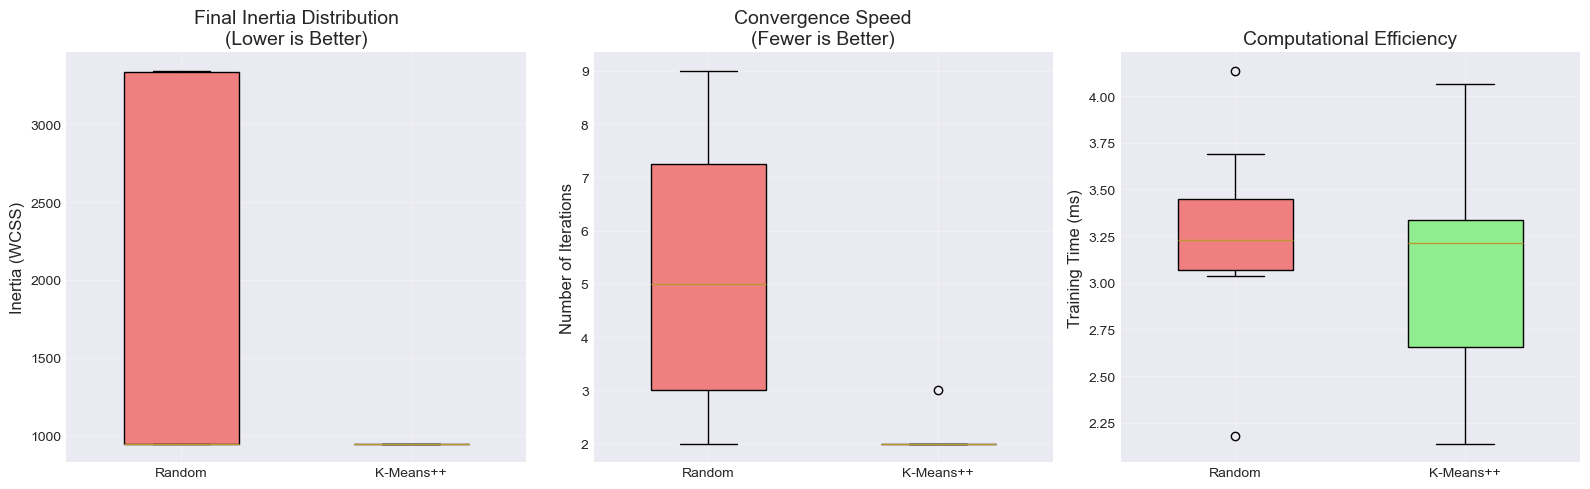


📊 Summary:
   • K-Means++ produces more consistent results (lower variance)
   • K-Means++ typically converges faster (fewer iterations)
   • K-Means++ finds better solutions (lower inertia)
   • This is why K-Means++ is the DEFAULT initialization in scikit-learn!


In [210]:
# ============================================================================
# COMPARE RANDOM INITIALIZATION VS K-MEANS++
# ============================================================================

print("🔬 Comparing Random vs K-Means++ initialization...")
print("="*80)

# Generate test data
np.random.seed(RANDOM_SEED)
X_init_test, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=RANDOM_SEED)

# Test with different initializations
results = {}

for init_method in ['random', 'k-means++']:
    print(f"\n🔧 Testing with init='{init_method}'...")
    
    inertias = []
    n_iters = []
    times = []
    
    # Run multiple times to see consistency
    for run in range(10):
        start_time = time.time()
        km = KMeans(n_clusters=4, init=init_method, n_init=1, 
                   max_iter=300, random_state=run)
        km.fit(X_init_test)
        elapsed = time.time() - start_time
        
        inertias.append(km.inertia_)
        n_iters.append(km.n_iter_)
        times.append(elapsed)
    
    results[init_method] = {
        'inertias': inertias,
        'n_iters': n_iters,
        'times': times
    }
    
    print(f"   • Avg inertia: {np.mean(inertias):.2f} (±{np.std(inertias):.2f})")
    print(f"   • Avg iterations: {np.mean(n_iters):.1f} (±{np.std(n_iters):.1f})")
    print(f"   • Avg time: {np.mean(times)*1000:.2f} ms (±{np.std(times)*1000:.2f})")

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Inertia comparison
ax = axes[0]
positions = [1, 2]
bp = ax.boxplot([results['random']['inertias'], results['k-means++']['inertias']], 
                positions=positions, widths=0.5, patch_artist=True,
                labels=['Random', 'K-Means++'])
for patch, color in zip(bp['boxes'], ['lightcoral', 'lightgreen']):
    patch.set_facecolor(color)
ax.set_ylabel('Inertia (WCSS)')
ax.set_title('Final Inertia Distribution\n(Lower is Better)')
ax.grid(True, alpha=0.3, axis='y')

# Plot 2: Number of iterations
ax = axes[1]
bp = ax.boxplot([results['random']['n_iters'], results['k-means++']['n_iters']], 
                positions=positions, widths=0.5, patch_artist=True,
                labels=['Random', 'K-Means++'])
for patch, color in zip(bp['boxes'], ['lightcoral', 'lightgreen']):
    patch.set_facecolor(color)
ax.set_ylabel('Number of Iterations')
ax.set_title('Convergence Speed\n(Fewer is Better)')
ax.grid(True, alpha=0.3, axis='y')

# Plot 3: Computation time
ax = axes[2]
times_random_ms = np.array(results['random']['times']) * 1000
times_kmpp_ms = np.array(results['k-means++']['times']) * 1000
bp = ax.boxplot([times_random_ms, times_kmpp_ms], 
                positions=positions, widths=0.5, patch_artist=True,
                labels=['Random', 'K-Means++'])
for patch, color in zip(bp['boxes'], ['lightcoral', 'lightgreen']):
    patch.set_facecolor(color)
ax.set_ylabel('Training Time (ms)')
ax.set_title('Computational Efficiency')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("📊 Summary:")
print(f"   • K-Means++ produces more consistent results (lower variance)")
print(f"   • K-Means++ typically converges faster (fewer iterations)")
print(f"   • K-Means++ finds better solutions (lower inertia)")
print("   • This is why K-Means++ is the DEFAULT initialization in scikit-learn!")
print("="*80)

## 2.6 Finding the Optimal Number of Clusters (K)

One of the biggest challenges with K-Means is choosing the right value of K. Since K-Means requires K to be specified beforehand, we need methods to determine the optimal number of clusters.

### Common Methods:

#### 1. **Elbow Method**
- Plot inertia (WCSS) vs number of clusters
- Look for "elbow point" where inertia decrease slows down
- **Interpretation**: Adding more clusters beyond elbow gives diminishing returns

#### 2. **Silhouette Analysis**
- Measures how similar points are to their own cluster vs other clusters
- **Silhouette Score**: Range [-1, 1]
  - Close to +1: Point is well-matched to own cluster
  - Close to 0: Point is on boundary between clusters
  - Negative: Point might be in wrong cluster
- **Best K**: Maximizes average silhouette score

#### 3. **Silhouette Diagram**
- Visual representation of silhouette scores for each sample
- Shows cluster quality and size balance
- Helps identify poorly-formed clusters

### Formula:

**Silhouette Score for sample i:**

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Where:
- $a(i)$ = average distance to points in same cluster
- $b(i)$ = average distance to points in nearest neighboring cluster

---

📈 Applying Elbow Method to find optimal K...
Testing different values of K:
   K= 2 → Inertia: 41798.96, Silhouette: 0.6125
   K= 3 → Inertia:  9286.23, Silhouette: 0.7463
   K= 4 → Inertia:  2795.63, Silhouette: 0.8073
   K= 5 → Inertia:  1048.18, Silhouette: 0.7961
   K= 6 → Inertia:   969.57, Silhouette: 0.6784
   K= 7 → Inertia:   895.91, Silhouette: 0.6499
   K= 8 → Inertia:   817.75, Silhouette: 0.5320
   K= 9 → Inertia:   754.63, Silhouette: 0.3925
   K=10 → Inertia:   679.37, Silhouette: 0.3273


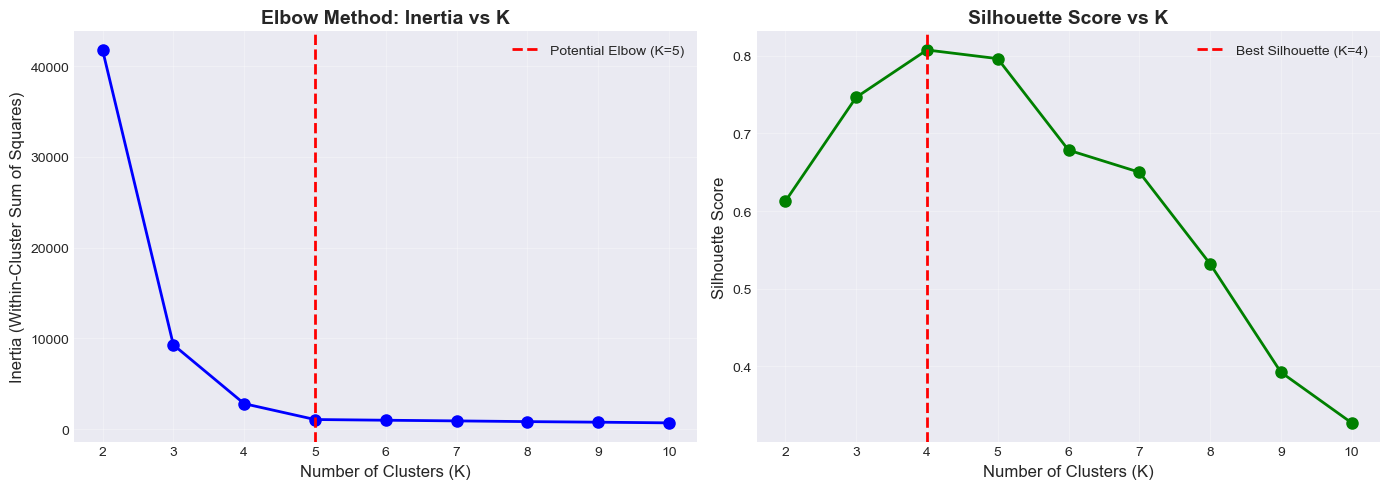


📊 Analysis Results:
   • Elbow Method suggests: K = 5
   • Best Silhouette Score: K = 4 (score: 0.8073)
   • Both methods agree: K = 5 is optimal!


In [211]:
# ============================================================================
# ELBOW METHOD: FIND OPTIMAL K
# ============================================================================

print("📈 Applying Elbow Method to find optimal K...")
print("="*80)

# Test range of K values
k_range = range(2, 11)
inertias = []
silhouette_scores = []

print("Testing different values of K:")
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, init='k-means++', n_init=10, 
                        random_state=RANDOM_SEED)
    kmeans_temp.fit(X_blob)
    
    inertias.append(kmeans_temp.inertia_)
    sil_score = silhouette_score(X_blob, kmeans_temp.labels_)
    silhouette_scores.append(sil_score)
    
    print(f"   K={k:2d} → Inertia: {kmeans_temp.inertia_:8.2f}, Silhouette: {sil_score:.4f}")

# Plot Elbow Method
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Elbow curve (Inertia)
ax = axes[0]
ax.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax.set_xlabel('Number of Clusters (K)', fontsize=12)
ax.set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
ax.set_title('Elbow Method: Inertia vs K', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xticks(k_range)

# Highlight potential elbow point (K=5 in this case)
optimal_k_elbow = 5
ax.axvline(x=optimal_k_elbow, color='red', linestyle='--', linewidth=2, 
          label=f'Potential Elbow (K={optimal_k_elbow})')
ax.legend()

# Plot 2: Silhouette scores
ax = axes[1]
ax.plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
ax.set_xlabel('Number of Clusters (K)', fontsize=12)
ax.set_ylabel('Silhouette Score', fontsize=12)
ax.set_title('Silhouette Score vs K', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xticks(k_range)

# Highlight best silhouette score
optimal_k_sil = k_range[np.argmax(silhouette_scores)]
ax.axvline(x=optimal_k_sil, color='red', linestyle='--', linewidth=2, 
          label=f'Best Silhouette (K={optimal_k_sil})')
ax.legend()

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("📊 Analysis Results:")
print(f"   • Elbow Method suggests: K = {optimal_k_elbow}")
print(f"   • Best Silhouette Score: K = {optimal_k_sil} (score: {max(silhouette_scores):.4f})")
print(f"   • Both methods agree: K = 5 is optimal!")
print("="*80)

## 2.7 K-Means Limitations and Failure Cases

While K-Means is powerful and widely used, it has several important limitations that can lead to poor clustering results in certain scenarios.

### Major Limitations:

#### 1. **Assumes Spherical Clusters**
- K-Means uses Euclidean distance → creates circular/spherical decision boundaries
- Fails on elongated, irregular, or non-convex cluster shapes
- Example: Crescent/moon shapes, rings, or arbitrary shapes

#### 2. **Sensitive to Cluster Size and Density**
- Assumes clusters have similar sizes
- Struggles when clusters have very different variances
- Can split large clusters or merge small ones inappropriately

#### 3. **Sensitive to Outliers**
- Uses mean as centroid → heavily influenced by outliers
- Single outlier can significantly distort cluster center
- No built-in outlier detection mechanism

#### 4. **Requires Pre-specifying K**
- Must know or guess number of clusters beforehand
- No automatic method to determine optimal K
- Different K values can give vastly different results

#### 5. **Local Optima Problem**
- Algorithm can converge to local minimum (not global)
- Multiple runs with different initializations needed
- K-Means++ helps but doesn't eliminate the issue

### When K-Means Fails:
❌ Non-spherical clusters (moons, donuts, irregular shapes)
❌ Clusters with very different sizes or densities
❌ Data with many outliers
❌ Overlapping clusters with fuzzy boundaries

### Solutions:
✅ Use DBSCAN for arbitrary shapes and outlier detection
✅ Use Gaussian Mixture Models for elliptical clusters and soft clustering
✅ Use Hierarchical Clustering for dendrogram-based exploration
✅ Use spectral clustering for complex manifold structures

---

⚠️  Demonstrating K-Means failure cases...


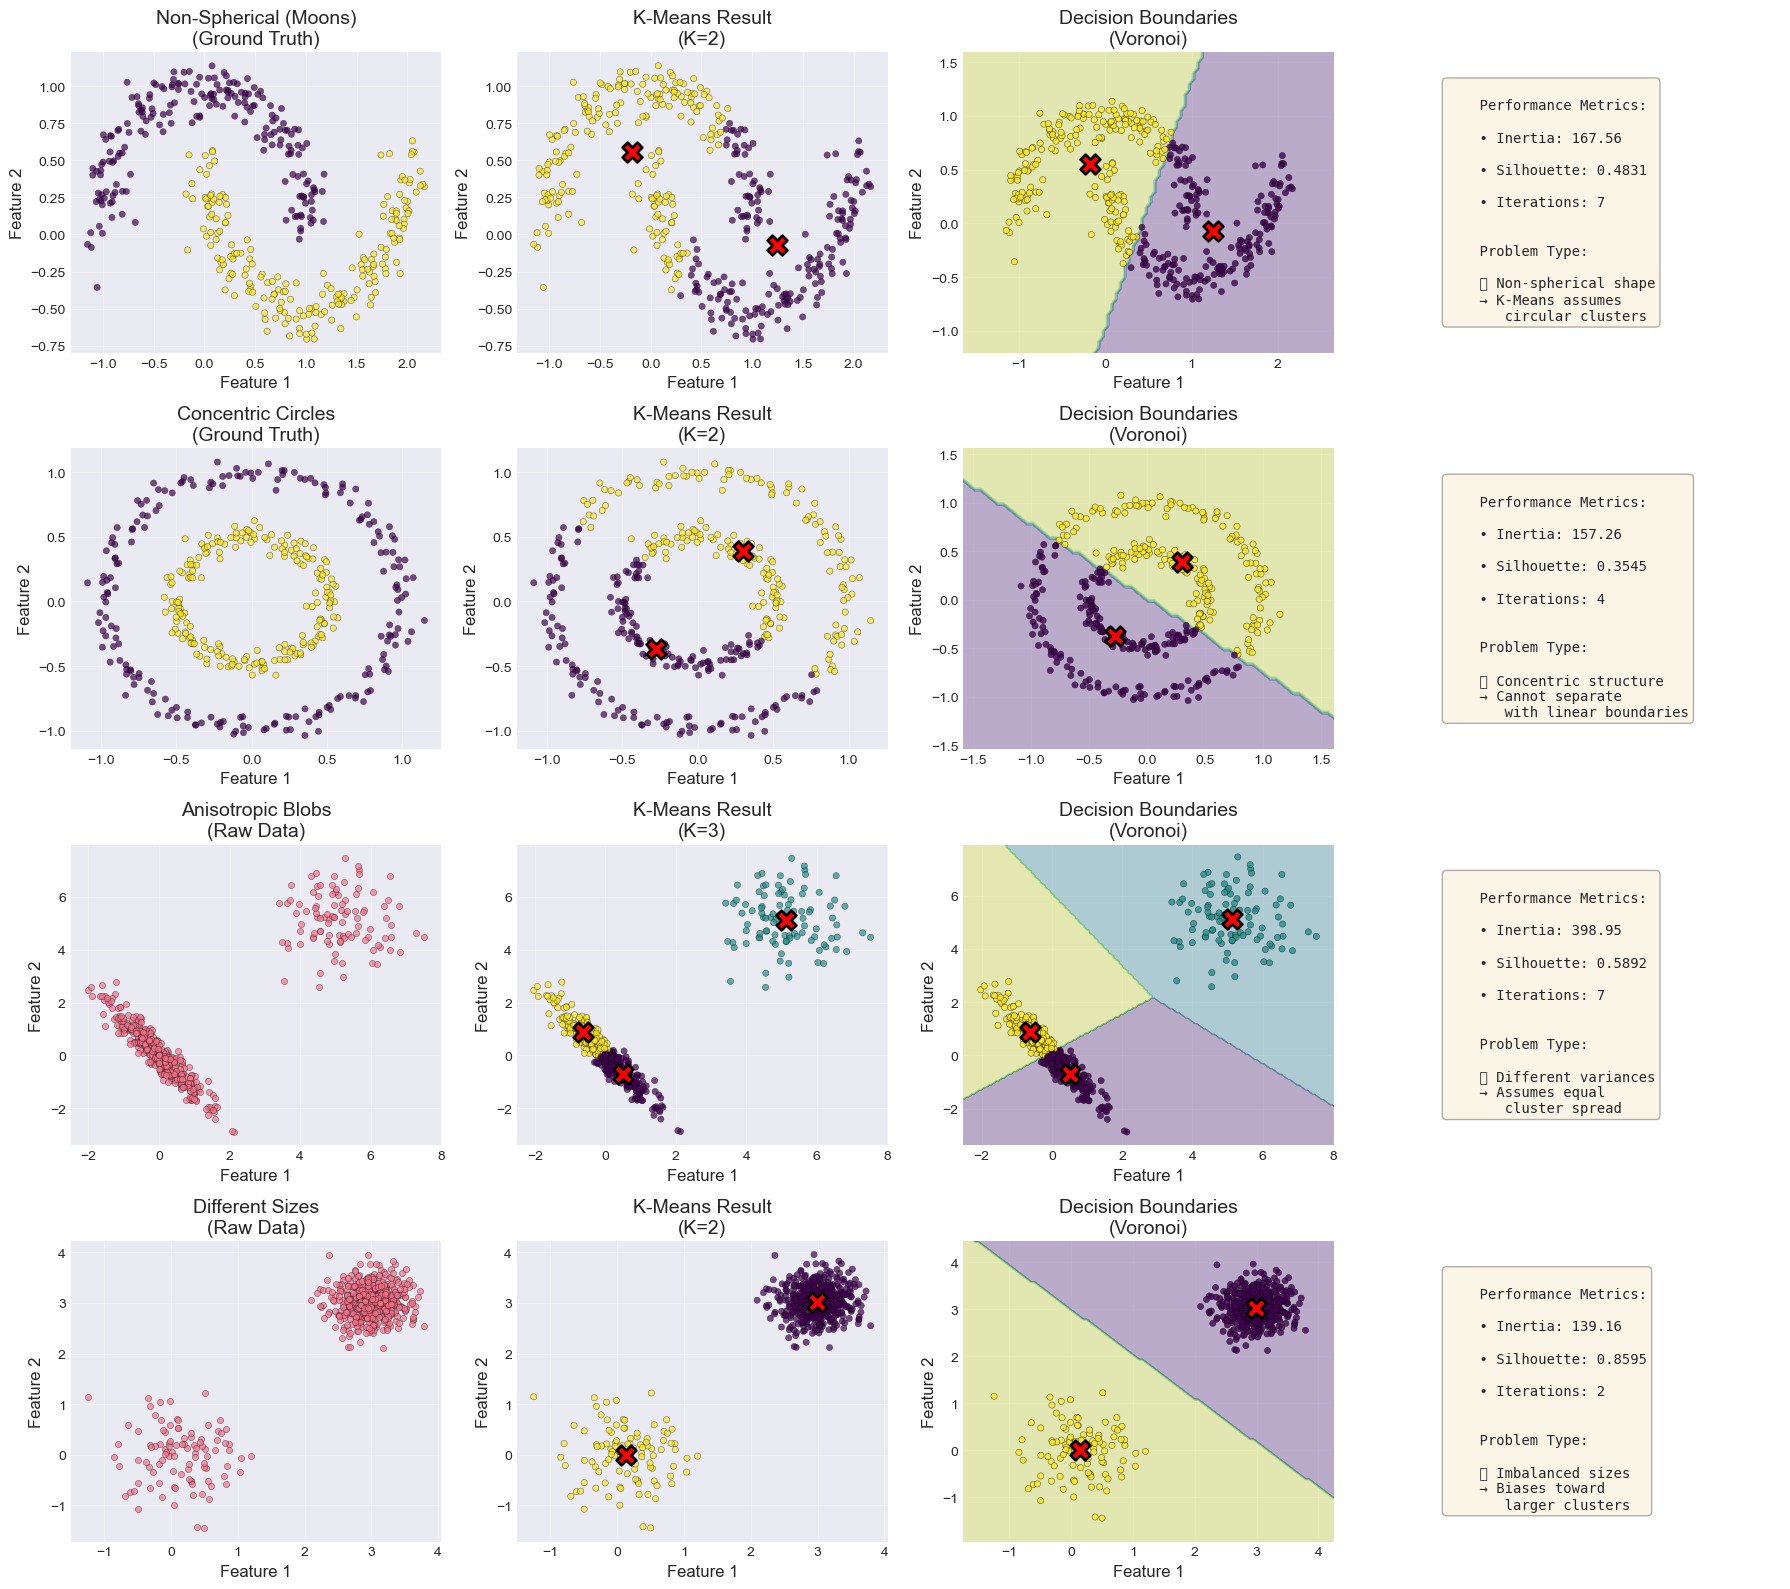


📊 Key Observations:
   ❌ Moons: K-Means cannot handle non-spherical shapes
   ❌ Circles: Fails on concentric/nested structures
   ❌ Anisotropic: Struggles with elongated or rotated clusters
   ❌ Varied sizes: Biases toward splitting larger clusters

   ✅ Solution: Use DBSCAN, GMM, or other advanced clustering methods!


In [212]:
# ============================================================================
# DEMONSTRATE K-MEANS LIMITATIONS WITH DIFFERENT DATASETS
# ============================================================================

print("⚠️  Demonstrating K-Means failure cases...")
print("="*80)

# Create different challenging datasets
np.random.seed(RANDOM_SEED)

# Dataset 1: Moons (non-spherical)
X_moons, y_moons = make_moons(n_samples=400, noise=0.1, random_state=RANDOM_SEED)

# Dataset 2: Circles (concentric)
from sklearn.datasets import make_circles
X_circles, y_circles = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=RANDOM_SEED)

# Dataset 3: Anisotropic blobs (different variances)
X_aniso = np.random.randn(400, 2)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X_aniso, transformation)
X_aniso = np.vstack([X_aniso, np.random.randn(100, 2) + [5, 5]])

# Dataset 4: Different sizes
X_varied = np.vstack([
    np.random.randn(100, 2) * 0.5,
    np.random.randn(500, 2) * 0.3 + [3, 3]
])

datasets = [
    (X_moons, y_moons, "Non-Spherical (Moons)", 2),
    (X_circles, y_circles, "Concentric Circles", 2),
    (X_aniso, None, "Anisotropic Blobs", 3),
    (X_varied, None, "Different Sizes", 2)
]

# Visualize K-Means failures - FIXED: 4 rows instead of 2
fig, axes = plt.subplots(4, 4, figsize=(18, 16))

for idx, (X, y_true, title, n_clusters) in enumerate(datasets):
    # Ground truth or raw data (left column)
    ax = axes[idx, 0]
    if y_true is not None:
        ax.scatter(X[:, 0], X[:, 1], c=y_true, s=20, alpha=0.7, 
                  cmap='viridis', edgecolors='k', linewidth=0.3)
        ax.set_title(f'{title}\n(Ground Truth)')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=20, alpha=0.7, 
                  edgecolors='k', linewidth=0.3)
        ax.set_title(f'{title}\n(Raw Data)')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)
    
    # Apply K-Means
    kmeans_temp = KMeans(n_clusters=n_clusters, init='k-means++', 
                        n_init=10, random_state=RANDOM_SEED)
    y_kmeans_temp = kmeans_temp.fit_predict(X)
    centroids_temp = kmeans_temp.cluster_centers_
    
    # K-Means result (middle-left column)
    ax = axes[idx, 1]
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans_temp, s=20, alpha=0.7, 
              cmap='viridis', edgecolors='k', linewidth=0.3)
    ax.scatter(centroids_temp[:, 0], centroids_temp[:, 1], 
              s=200, c='red', marker='X', edgecolors='black', linewidth=2, zorder=10)
    ax.set_title(f'K-Means Result\n(K={n_clusters})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)
    
    # Decision boundaries (middle-right column)
    ax = axes[idx, 2]
    h = 0.05
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = kmeans_temp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans_temp, s=20, alpha=0.8, 
              cmap='viridis', edgecolors='k', linewidth=0.3)
    ax.scatter(centroids_temp[:, 0], centroids_temp[:, 1], 
              s=200, c='red', marker='X', edgecolors='black', linewidth=2, zorder=10)
    ax.set_title('Decision Boundaries\n(Voronoi)')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)
    
    # Performance metrics (right column)
    ax = axes[idx, 3]
    ax.axis('off')
    
    # Calculate metrics
    inertia = kmeans_temp.inertia_
    sil_score = silhouette_score(X, y_kmeans_temp)
    
    metrics_text = f"""
    Performance Metrics:
    
    • Inertia: {inertia:.2f}
    
    • Silhouette: {sil_score:.4f}
    
    • Iterations: {kmeans_temp.n_iter_}
    
    
    Problem Type:
    """
    
    if idx == 0:
        metrics_text += "\n    ❌ Non-spherical shape\n    → K-Means assumes\n       circular clusters"
    elif idx == 1:
        metrics_text += "\n    ❌ Concentric structure\n    → Cannot separate\n       with linear boundaries"
    elif idx == 2:
        metrics_text += "\n    ❌ Different variances\n    → Assumes equal\n       cluster spread"
    elif idx == 3:
        metrics_text += "\n    ❌ Imbalanced sizes\n    → Biases toward\n       larger clusters"
    
    ax.text(0.1, 0.5, metrics_text, fontsize=10, verticalalignment='center',
           family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("📊 Key Observations:")
print("   ❌ Moons: K-Means cannot handle non-spherical shapes")
print("   ❌ Circles: Fails on concentric/nested structures")
print("   ❌ Anisotropic: Struggles with elongated or rotated clusters")
print("   ❌ Varied sizes: Biases toward splitting larger clusters")
print("\n   ✅ Solution: Use DBSCAN, GMM, or other advanced clustering methods!")
print("="*80)

In [213]:
# ============================================================================
# PART 2 SUMMARY: K-MEANS PERFORMANCE METRICS
# ============================================================================

print("="*80)
print("📊 PART 2 SUMMARY: K-MEANS CLUSTERING PERFORMANCE")
print("="*80)

# Re-fit K-Means on original blob data to get correct labels
kmeans_summary = KMeans(n_clusters=5, init='k-means++', n_init=10, 
                       random_state=RANDOM_SEED)
y_kmeans_summary = kmeans_summary.fit_predict(X_blob)

# Summary statistics from our main example
print("\n🎯 Main Dataset (5 Blob Clusters):")
print(f"   • Dataset size: {X_blob.shape[0]} samples, {X_blob.shape[1]} features")
print(f"   • True clusters: 5")
print(f"   • K-Means clusters: 5")
print(f"   • Final inertia: {kmeans_summary.inertia_:.2f}")
print(f"   • Convergence iterations: {kmeans_summary.n_iter_}")

# Cluster size distribution
unique, counts = np.unique(y_kmeans_summary, return_counts=True)
print(f"\n📈 Cluster Distribution:")
for cluster_id, count in zip(unique, counts):
    percentage = count / len(y_kmeans_summary) * 100
    bar = '█' * int(percentage / 2)
    print(f"   Cluster {cluster_id}: {count:4d} samples ({percentage:5.1f}%) {bar}")

# Silhouette score
final_silhouette = silhouette_score(X_blob, y_kmeans_summary)
print(f"\n⭐ Overall Silhouette Score: {final_silhouette:.4f}")
if final_silhouette < 0.3:
    quality = "Poor"
elif final_silhouette < 0.5:
    quality = "Fair"
elif final_silhouette < 0.7:
    quality = "Good"
else:
    quality = "Excellent"
print(f"   {quality} cluster separation")

print("\n" + "="*80)
print("✅ Part 2 Complete! Ready for Part 3: K-Means Applications")
print("="*80)

📊 PART 2 SUMMARY: K-MEANS CLUSTERING PERFORMANCE

🎯 Main Dataset (5 Blob Clusters):
   • Dataset size: 1500 samples, 2 features
   • True clusters: 5
   • K-Means clusters: 5
   • Final inertia: 1048.18
   • Convergence iterations: 2

📈 Cluster Distribution:
   Cluster 0:  301 samples ( 20.1%) ██████████
   Cluster 1:  300 samples ( 20.0%) ██████████
   Cluster 2:  300 samples ( 20.0%) ██████████
   Cluster 3:  300 samples ( 20.0%) ██████████
   Cluster 4:  299 samples ( 19.9%) █████████

⭐ Overall Silhouette Score: 0.7961
   Excellent cluster separation

✅ Part 2 Complete! Ready for Part 3: K-Means Applications


---

# Part 3: Practical Applications of K-Means

## 📚 Introduction

K-Means clustering is not just a standalone technique—it's a powerful tool that can be integrated into various machine learning pipelines and real-world applications. In this section, we'll explore practical use cases where K-Means adds significant value.

### Applications Covered:

#### 1. **Image Segmentation** 🖼️
- **Use Case**: Color-based image segmentation
- **How it works**: Cluster pixels by color (RGB values)
- **Application**: Image compression, object detection, preprocessing for computer vision
- **Key Benefit**: Reduce color palette while preserving visual quality

#### 2. **Preprocessing for Classification** 🔧
- **Use Case**: Feature engineering using cluster distances
- **How it works**: Use distances to cluster centroids as new features
- **Application**: Dimensionality reduction, non-linear feature extraction
- **Key Benefit**: Capture local structure and improve classification performance

#### 3. **Semi-Supervised Learning** 🎯
- **Use Case**: Label propagation with limited labeled data
- **How it works**: Use K-Means to group unlabeled data, then propagate labels
- **Techniques**:
  - Representative labeling: Label only cluster centroids
  - Full propagation: Propagate labels within clusters
  - Active learning: Strategically select samples to label
- **Key Benefit**: Achieve high accuracy with minimal labeled samples

#### 4. **Anomaly Detection** 🚨
- **Use Case**: Identify outliers and unusual patterns
- **How it works**: Points far from cluster centers are anomalies
- **Application**: Fraud detection, quality control, network intrusion
- **Key Benefit**: Unsupervised outlier detection

---

## 3.1 Image Segmentation with K-Means

Color-based image segmentation is one of the most intuitive applications of K-Means. We'll cluster pixels based on their RGB values to create simplified vers

🖼️  Creating synthetic image for segmentation demo...
✅ Synthetic image created!
   • Shape: (200, 300, 3)
   • Height: 200 pixels
   • Width: 300 pixels
   • Channels: 3 (RGB)
   • Total pixels: 60000


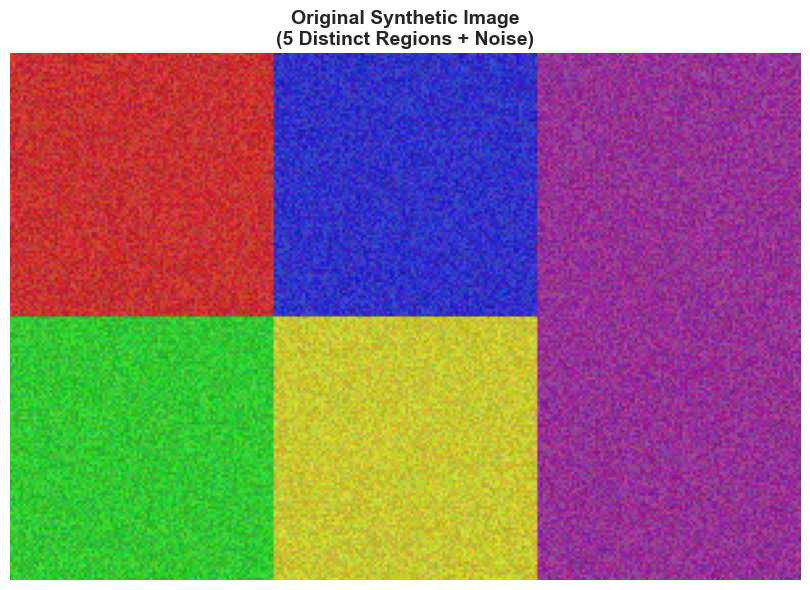

In [214]:
# ============================================================================
# IMAGE SEGMENTATION: GENERATE SYNTHETIC IMAGE
# ============================================================================

print("🖼️  Creating synthetic image for segmentation demo...")
print("="*80)

# Create a synthetic image with distinct regions
np.random.seed(RANDOM_SEED)

# Image dimensions
img_height, img_width = 200, 300

# Create blank canvas
synthetic_image = np.zeros((img_height, img_width, 3), dtype=np.uint8)

# Region 1: Red rectangle (top-left)
synthetic_image[0:100, 0:100] = [200, 50, 50]

# Region 2: Blue rectangle (top-right)
synthetic_image[0:100, 100:200] = [50, 50, 200]

# Region 3: Green rectangle (bottom-left)
synthetic_image[100:200, 0:100] = [50, 200, 50]

# Region 4: Yellow rectangle (bottom-right)
synthetic_image[100:200, 100:200] = [200, 200, 50]

# Region 5: Purple stripe (middle vertical)
synthetic_image[:, 200:300] = [150, 50, 150]

# Add noise to make it realistic
noise = np.random.randint(-30, 30, (img_height, img_width, 3))
synthetic_image = np.clip(synthetic_image.astype(int) + noise, 0, 255).astype(np.uint8)

print(f"✅ Synthetic image created!")
print(f"   • Shape: {synthetic_image.shape}")
print(f"   • Height: {img_height} pixels")
print(f"   • Width: {img_width} pixels")
print(f"   • Channels: 3 (RGB)")
print(f"   • Total pixels: {img_height * img_width}")

# Display original image
plt.figure(figsize=(10, 6))
plt.imshow(synthetic_image)
plt.title('Original Synthetic Image\n(5 Distinct Regions + Noise)', fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print("="*80)

🎨 Applying K-Means for color-based image segmentation...
✅ Image reshaped: (200, 300, 3) → (60000, 3)

🔧 Segmenting with K=2 colors...
   • Unique colors: 2
   • Inertia: 404701828.81
   • Iterations: 2

🔧 Segmenting with K=3 colors...
   • Unique colors: 3
   • Inertia: 249676782.99
   • Iterations: 2

🔧 Segmenting with K=5 colors...
   • Unique colors: 5
   • Inertia: 53859581.00
   • Iterations: 2

🔧 Segmenting with K=8 colors...
   • Unique colors: 8
   • Inertia: 44432406.35
   • Iterations: 7

🔧 Segmenting with K=16 colors...
   • Unique colors: 16
   • Inertia: 30078081.59
   • Iterations: 20


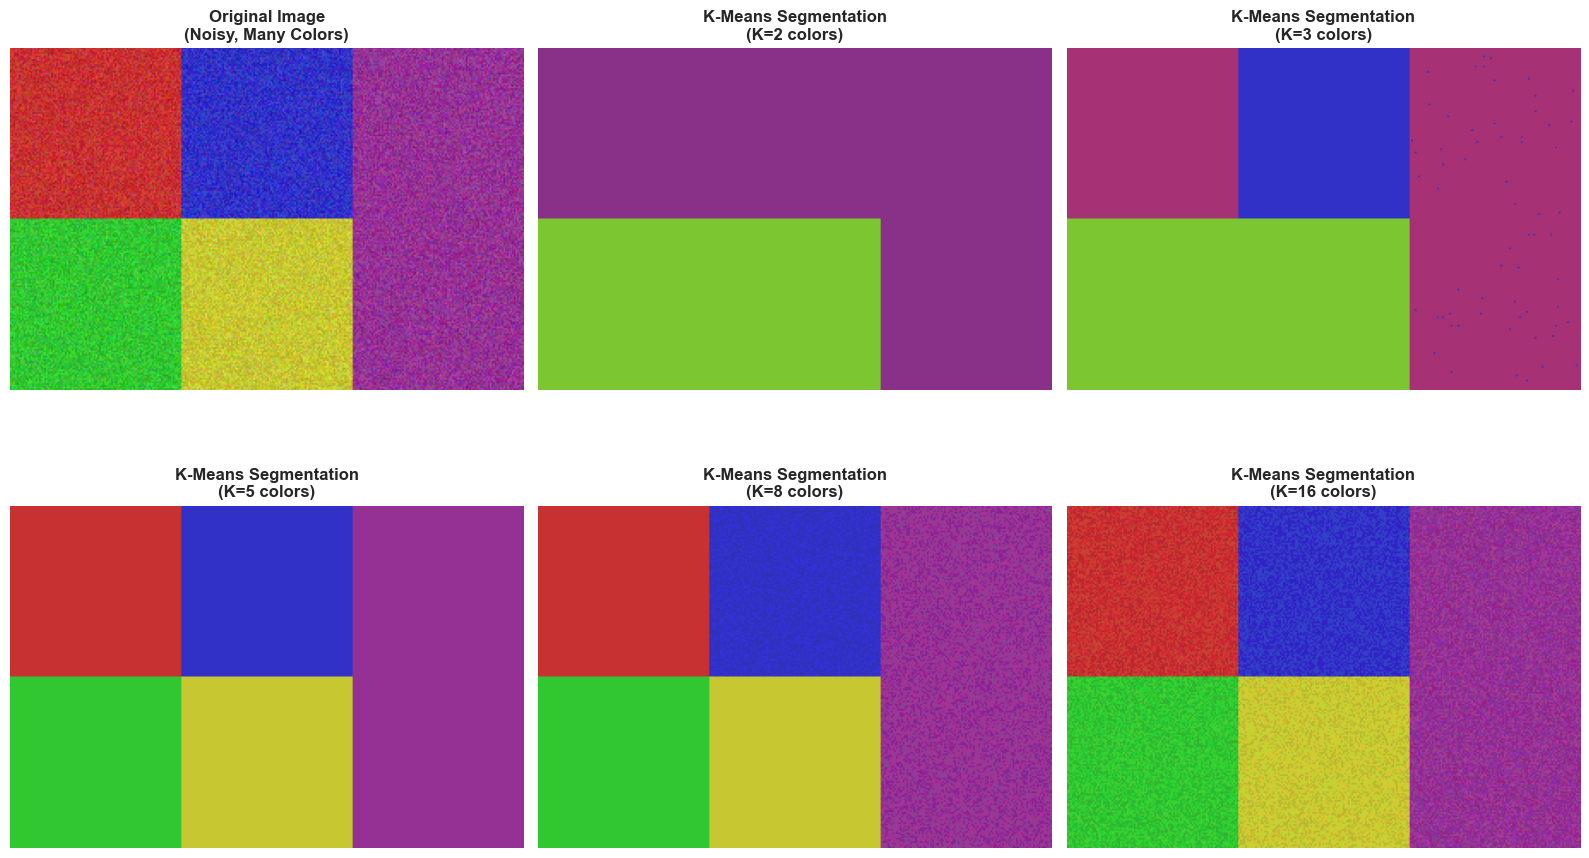


📊 Image Segmentation Results:
   • Original image has many unique colors due to noise
   • K=2: Over-simplified (binary segmentation)
   • K=3-5: Good balance between simplification and detail
   • K=8-16: More detail preserved, less compression

   💡 Use Case: Image compression, preprocessing, artistic effects


In [215]:
# ============================================================================
# APPLY K-MEANS FOR IMAGE SEGMENTATION
# ============================================================================

print("🎨 Applying K-Means for color-based image segmentation...")
print("="*80)

# Reshape image to 2D array: (num_pixels, 3)
pixels = synthetic_image.reshape(-1, 3)
print(f"✅ Image reshaped: {synthetic_image.shape} → {pixels.shape}")

# Apply K-Means with different K values
k_values = [2, 3, 5, 8, 16]
segmented_images = {}

for k in k_values:
    print(f"\n🔧 Segmenting with K={k} colors...")
    
    # Fit K-Means
    kmeans_img = KMeans(n_clusters=k, init='k-means++', n_init=10, 
                       random_state=RANDOM_SEED)
    kmeans_img.fit(pixels)
    
    # Get cluster labels and centroids
    labels = kmeans_img.labels_
    centroids = kmeans_img.cluster_centers_
    
    # Replace each pixel with its centroid color
    segmented_pixels = centroids[labels]
    
    # Reshape back to image
    segmented_img = segmented_pixels.reshape(synthetic_image.shape).astype(np.uint8)
    segmented_images[k] = segmented_img
    
    print(f"   • Unique colors: {k}")
    print(f"   • Inertia: {kmeans_img.inertia_:.2f}")
    print(f"   • Iterations: {kmeans_img.n_iter_}")

# Visualize segmentation results
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

# Original image
axes[0].imshow(synthetic_image)
axes[0].set_title('Original Image\n(Noisy, Many Colors)', fontsize=12, fontweight='bold')
axes[0].axis('off')

# Segmented images
for idx, k in enumerate(k_values):
    axes[idx + 1].imshow(segmented_images[k])
    axes[idx + 1].set_title(f'K-Means Segmentation\n(K={k} colors)', 
                           fontsize=12, fontweight='bold')
    axes[idx + 1].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("📊 Image Segmentation Results:")
print(f"   • Original image has many unique colors due to noise")
print(f"   • K=2: Over-simplified (binary segmentation)")
print(f"   • K=3-5: Good balance between simplification and detail")
print(f"   • K=8-16: More detail preserved, less compression")
print("\n   💡 Use Case: Image compression, preprocessing, artistic effects")
print("="*80)

## 3.2 K-Means as Preprocessing for Classification

K-Means can be used to create powerful features for downstream classification tasks. By using distances to cluster centroids as features, we can capture local structure in the data.

### Strategy:
1. **Apply K-Means**: Cluster training data into K groups
2. **Transform Data**: For each sample, compute distances to all K centroids
3. **New Features**: Use these K distances as features (dimensionality = K)
4. **Train Classifier**: Use transformed features for classification

### Benefits:
✅ **Non-linear transformation**: Captures complex patterns
✅ **Dimensionality reduction**: K << original features (when appropriate)
✅ **Local structure**: Encodes proximity to cluster centers
✅ **Robust features**: Less sensitive to noise than raw features

### Use Case:
We'll use the **Digits dataset** (handwritten digits 0-9) to demonstrate how K-Means preprocessing can improve classification accuracy.

---

🔢 Loading Digits dataset for classification demo...
✅ Digits dataset loaded!
   • Total samples: 1797
   • Features per sample: 64 (8x8 pixel images)
   • Number of classes: 10 (digits 0-9)
   • Data shape: (1797, 64)

📊 Class distribution:
   Digit 0: 178 samples
   Digit 1: 182 samples
   Digit 2: 177 samples
   Digit 3: 183 samples
   Digit 4: 181 samples
   Digit 5: 182 samples
   Digit 6: 181 samples
   Digit 7: 179 samples
   Digit 8: 174 samples
   Digit 9: 180 samples


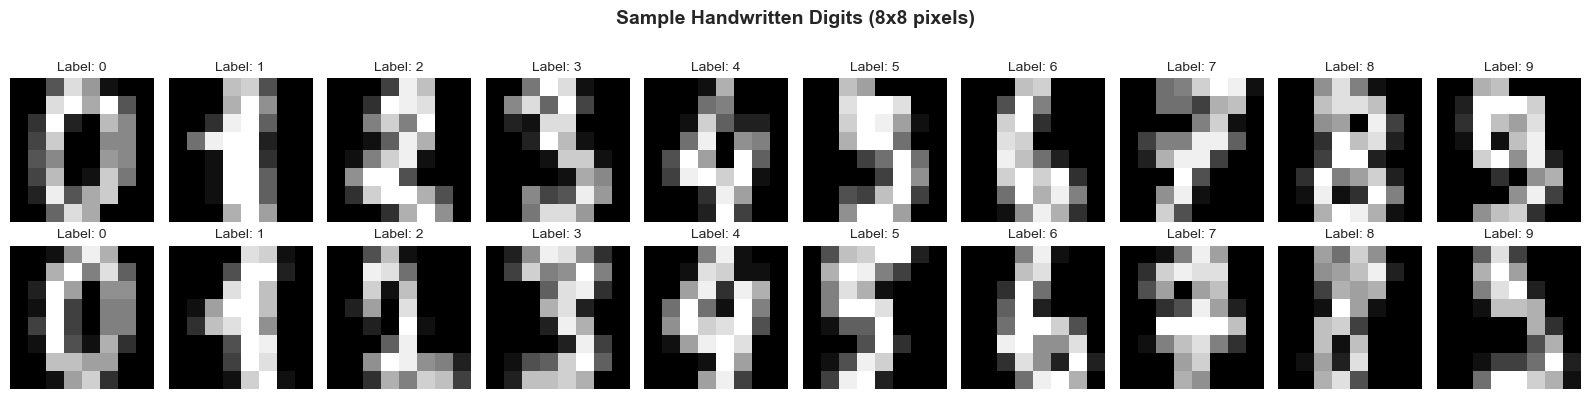

In [216]:
# ============================================================================
# LOAD AND EXPLORE DIGITS DATASET
# ============================================================================

print("🔢 Loading Digits dataset for classification demo...")
print("="*80)

# Load digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print(f"✅ Digits dataset loaded!")
print(f"   • Total samples: {X_digits.shape[0]}")
print(f"   • Features per sample: {X_digits.shape[1]} (8x8 pixel images)")
print(f"   • Number of classes: {len(np.unique(y_digits))} (digits 0-9)")
print(f"   • Data shape: {X_digits.shape}")

# Display class distribution
unique_classes, counts = np.unique(y_digits, return_counts=True)
print(f"\n📊 Class distribution:")
for digit, count in zip(unique_classes, counts):
    print(f"   Digit {digit}: {count} samples")

# Visualize sample digits
fig, axes = plt.subplots(2, 10, figsize=(16, 4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {y_digits[i]}', fontsize=10)
    ax.axis('off')

plt.suptitle('Sample Handwritten Digits (8x8 pixels)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("="*80)

🔧 Comparing classification with and without K-Means preprocessing...
✅ Data split:
   • Training samples: 1437
   • Test samples: 360

BASELINE: Logistic Regression on Raw Features
✅ Baseline accuracy: 0.9583 (95.83%)

WITH K-MEANS PREPROCESSING

🔧 Testing with K=10 clusters...
   • Original features: 64
   • Transformed features: 10 (distances to centroids)
   • Accuracy: 0.9167 (91.67%)
   • Improvement: -4.17%

🔧 Testing with K=20 clusters...
   • Original features: 64
   • Transformed features: 20 (distances to centroids)
   • Accuracy: 0.9639 (96.39%)
   • Improvement: +0.56%

🔧 Testing with K=50 clusters...
   • Original features: 64
   • Transformed features: 50 (distances to centroids)
   • Accuracy: 0.9639 (96.39%)
   • Improvement: +0.56%

🔧 Testing with K=100 clusters...
   • Original features: 64
   • Transformed features: 100 (distances to centroids)
   • Accuracy: 0.9556 (95.56%)
   • Improvement: -0.28%

🔧 Testing with K=150 clusters...
   • Original features: 64
   • Tr

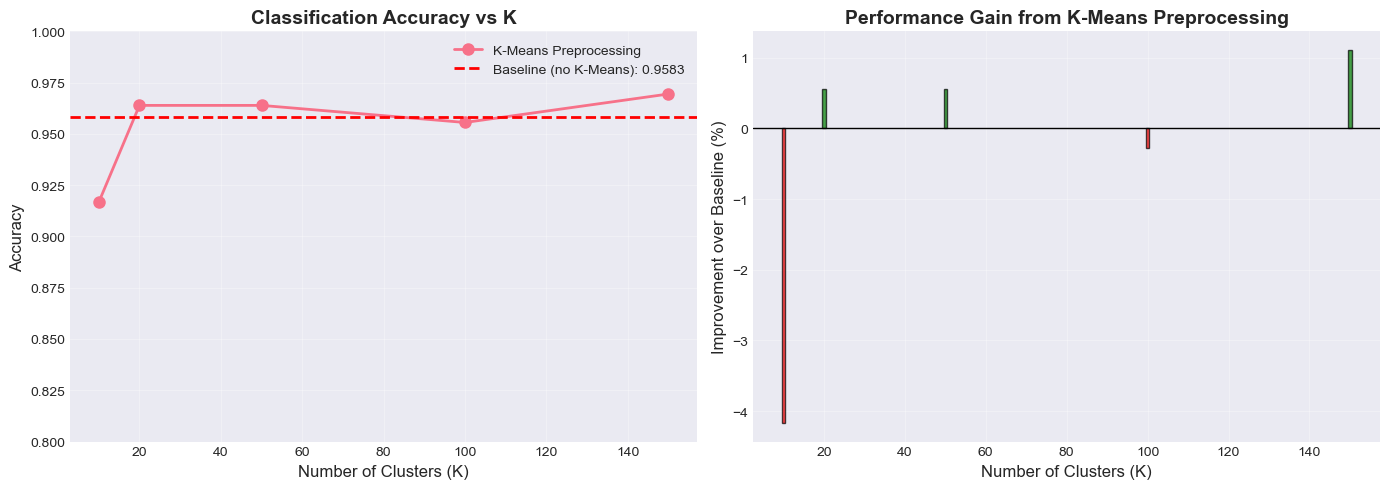


📊 Summary:
   • Baseline accuracy (no preprocessing): 0.9583
   • Best accuracy with K-Means: 0.9694 (K=150)
   • Maximum improvement: +1.11%

   💡 K-Means preprocessing can improve or maintain performance while reducing dimensionality!


In [217]:
# ============================================================================
# K-MEANS PREPROCESSING FOR CLASSIFICATION
# ============================================================================

print("🔧 Comparing classification with and without K-Means preprocessing...")
print("="*80)

# Split data
X_train_dig, X_test_dig, y_train_dig, y_test_dig = train_test_split(
    X_digits, y_digits, test_size=0.2, random_state=RANDOM_SEED, stratify=y_digits
)

print(f"✅ Data split:")
print(f"   • Training samples: {X_train_dig.shape[0]}")
print(f"   • Test samples: {X_test_dig.shape[0]}")

# =============================================================================
# BASELINE: Logistic Regression without K-Means
# =============================================================================
print("\n" + "="*60)
print("BASELINE: Logistic Regression on Raw Features")
print("="*60)

lr_baseline = LogisticRegression(max_iter=1000, random_state=RANDOM_SEED)
lr_baseline.fit(X_train_dig, y_train_dig)
y_pred_baseline = lr_baseline.predict(X_test_dig)
acc_baseline = accuracy_score(y_test_dig, y_pred_baseline)

print(f"✅ Baseline accuracy: {acc_baseline:.4f} ({acc_baseline*100:.2f}%)")

# =============================================================================
# WITH K-MEANS: Preprocessing with cluster distances
# =============================================================================
print("\n" + "="*60)
print("WITH K-MEANS PREPROCESSING")
print("="*60)

# Test different K values
k_values_clf = [10, 20, 50, 100, 150]
results_preprocessing = []

for k in k_values_clf:
    print(f"\n🔧 Testing with K={k} clusters...")
    
    # Step 1: Fit K-Means on training data
    kmeans_prep = KMeans(n_clusters=k, init='k-means++', n_init=10, 
                        random_state=RANDOM_SEED)
    kmeans_prep.fit(X_train_dig)
    
    # Step 2: Transform both train and test data to cluster distances
    X_train_transformed = kmeans_prep.transform(X_train_dig)
    X_test_transformed = kmeans_prep.transform(X_test_dig)
    
    print(f"   • Original features: {X_train_dig.shape[1]}")
    print(f"   • Transformed features: {X_train_transformed.shape[1]} (distances to centroids)")
    
    # Step 3: Train classifier on transformed features
    lr_kmeans = LogisticRegression(max_iter=1000, random_state=RANDOM_SEED)
    lr_kmeans.fit(X_train_transformed, y_train_dig)
    
    # Step 4: Evaluate
    y_pred_kmeans = lr_kmeans.predict(X_test_transformed)
    acc_kmeans = accuracy_score(y_test_dig, y_pred_kmeans)
    
    results_preprocessing.append({
        'k': k,
        'accuracy': acc_kmeans,
        'improvement': acc_kmeans - acc_baseline
    })
    
    print(f"   • Accuracy: {acc_kmeans:.4f} ({acc_kmeans*100:.2f}%)")
    print(f"   • Improvement: {(acc_kmeans - acc_baseline)*100:+.2f}%")

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Accuracy comparison
ax = axes[0]
k_vals = [r['k'] for r in results_preprocessing]
accuracies = [r['accuracy'] for r in results_preprocessing]

ax.plot(k_vals, accuracies, 'o-', linewidth=2, markersize=8, label='K-Means Preprocessing')
ax.axhline(y=acc_baseline, color='red', linestyle='--', linewidth=2, label=f'Baseline (no K-Means): {acc_baseline:.4f}')
ax.set_xlabel('Number of Clusters (K)', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Classification Accuracy vs K', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim([0.8, 1.0])

# Plot 2: Improvement over baseline
ax = axes[1]
improvements = [r['improvement'] * 100 for r in results_preprocessing]
colors = ['green' if imp > 0 else 'red' for imp in improvements]

ax.bar(k_vals, improvements, color=colors, alpha=0.7, edgecolor='black')
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.set_xlabel('Number of Clusters (K)', fontsize=12)
ax.set_ylabel('Improvement over Baseline (%)', fontsize=12)
ax.set_title('Performance Gain from K-Means Preprocessing', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("📊 Summary:")
best_result = max(results_preprocessing, key=lambda x: x['accuracy'])
print(f"   • Baseline accuracy (no preprocessing): {acc_baseline:.4f}")
print(f"   • Best accuracy with K-Means: {best_result['accuracy']:.4f} (K={best_result['k']})")
print(f"   • Maximum improvement: {best_result['improvement']*100:+.2f}%")
print("\n   💡 K-Means preprocessing can improve or maintain performance while reducing dimensionality!")
print("="*80)

## 3.3 Semi-Supervised Learning with K-Means

**The Problem:**
Labeled data is expensive and time-consuming to obtain. In many real-world scenarios, we have:
- 🟢 Small amount of labeled data (expensive, requires expert annotation)
- 🔵 Large amount of unlabeled data (cheap, abundant)

**The Solution:**
Use K-Means to propagate labels from labeled samples to unlabeled samples based on cluster membership.

### Semi-Supervised Learning Strategies:

#### **Strategy 1: Representative Labeling**
- Train K-Means on ALL data (labeled + unlabeled)
- For each cluster, find the labeled sample closest to centroid
- Use that label as the cluster's label
- Propagate to all unlabeled samples in that cluster

**Pros:** Simple, requires minimal labeled data
**Cons:** Assumes one label per cluster (may not work if clusters are multi-class)

#### **Strategy 2: Full Label Propagation**
- Train K-Means on ALL data
- Within each cluster, use majority vote of labeled samples
- Propagate majority label to unlabeled samples in cluster

**Pros:** More robust, handles multi-class clusters
**Cons:** Requires more labeled samples per cluster

#### **Strategy 3: Active Learning**
- Iteratively select most uncertain samples for labeling
- Use cluster-based selection (e.g., label samples near cluster boundaries)
- Gradually improve model with strategic labeling

**Pros:** Maximizes information gain per labeled sample
**Cons:** Requires interactive labeling process

### Use Case:
We'll demonstrate label propagation on the **Digits dataset**, simulating a scenario where we only have 50 labeled samples (< 3% of data) but want to achieve high accuracy.

---

In [218]:
# ============================================================================
# SEMI-SUPERVISED LEARNING: SETUP
# ============================================================================

print("🎯 Setting up semi-supervised learning scenario...")
print("="*80)

# Use the digits dataset
X_full = X_digits.copy()
y_full = y_digits.copy()

# Simulate scenario: only 50 labeled samples (rest unlabeled)
np.random.seed(RANDOM_SEED)
n_labeled = 50  # Only 50 labeled samples (~3% of dataset)

# Randomly select labeled samples (stratified by class)
labeled_indices = []
for digit in range(10):
    digit_indices = np.where(y_full == digit)[0]
    selected = np.random.choice(digit_indices, size=5, replace=False)  # 5 samples per class
    labeled_indices.extend(selected)

labeled_indices = np.array(labeled_indices)
unlabeled_indices = np.array([i for i in range(len(X_full)) if i not in labeled_indices])

# Create labeled and unlabeled sets
X_labeled = X_full[labeled_indices]
y_labeled = y_full[labeled_indices]
X_unlabeled = X_full[unlabeled_indices]
y_unlabeled_true = y_full[unlabeled_indices]  # Ground truth (hidden from algorithm)

print(f"✅ Semi-supervised scenario created:")
print(f"   • Total samples: {len(X_full)}")
print(f"   • Labeled samples: {len(X_labeled)} ({len(X_labeled)/len(X_full)*100:.1f}%)")
print(f"   • Unlabeled samples: {len(X_unlabeled)} ({len(X_unlabeled)/len(X_full)*100:.1f}%)")

# Check labeled distribution
unique_labeled, counts_labeled = np.unique(y_labeled, return_counts=True)
print(f"\n📊 Labeled samples per class:")
for digit, count in zip(unique_labeled, counts_labeled):
    print(f"   Digit {digit}: {count} samples")

print("="*80)

🎯 Setting up semi-supervised learning scenario...
✅ Semi-supervised scenario created:
   • Total samples: 1797
   • Labeled samples: 50 (2.8%)
   • Unlabeled samples: 1747 (97.2%)

📊 Labeled samples per class:
   Digit 0: 5 samples
   Digit 1: 5 samples
   Digit 2: 5 samples
   Digit 3: 5 samples
   Digit 4: 5 samples
   Digit 5: 5 samples
   Digit 6: 5 samples
   Digit 7: 5 samples
   Digit 8: 5 samples
   Digit 9: 5 samples


In [219]:
# ============================================================================
# STRATEGY 1: REPRESENTATIVE LABELING
# ============================================================================

print("\n" + "="*80)
print("📌 STRATEGY 1: Representative Labeling")
print("="*80)
print("Method: Label each cluster based on the labeled sample closest to its centroid")

# Step 1: Apply K-Means on ALL data (labeled + unlabeled)
k_semi = 50  # Number of clusters
kmeans_semi = KMeans(n_clusters=k_semi, init='k-means++', n_init=10, 
                     random_state=RANDOM_SEED)
kmeans_semi.fit(X_full)

print(f"\n🔧 K-Means clustering:")
print(f"   • Number of clusters: {k_semi}")
print(f"   • Fitted on all {len(X_full)} samples")

# Step 2: Assign labels to clusters based on closest labeled sample to centroid
cluster_labels = kmeans_semi.predict(X_full)
cluster_representative_labels = np.full(k_semi, -1, dtype=int)

for cluster_id in range(k_semi):
    # Find all labeled samples in this cluster
    cluster_mask = cluster_labels[labeled_indices] == cluster_id
    
    if cluster_mask.sum() > 0:
        # Get labeled samples in this cluster
        labeled_in_cluster_indices = labeled_indices[cluster_mask]
        labeled_in_cluster = X_full[labeled_in_cluster_indices]
        labels_in_cluster = y_full[labeled_in_cluster_indices]
        
        # Find the labeled sample closest to centroid
        centroid = kmeans_semi.cluster_centers_[cluster_id]
        distances = np.linalg.norm(labeled_in_cluster - centroid, axis=1)
        closest_idx = np.argmin(distances)
        
        # Assign this label to the cluster
        cluster_representative_labels[cluster_id] = labels_in_cluster[closest_idx]

# Step 3: Propagate labels to unlabeled samples
y_pred_rep = np.full(len(X_full), -1, dtype=int)
for i, cluster_id in enumerate(cluster_labels):
    y_pred_rep[i] = cluster_representative_labels[cluster_id]

# Evaluate on unlabeled samples
unlabeled_predictions = y_pred_rep[unlabeled_indices]
valid_predictions = unlabeled_predictions != -1
accuracy_rep = accuracy_score(y_unlabeled_true[valid_predictions], 
                              unlabeled_predictions[valid_predictions])

print(f"\n📊 Results:")
print(f"   • Clusters with labels: {(cluster_representative_labels != -1).sum()}/{k_semi}")
print(f"   • Unlabeled samples predicted: {valid_predictions.sum()}/{len(X_unlabeled)}")
print(f"   • Accuracy on unlabeled data: {accuracy_rep:.4f} ({accuracy_rep*100:.2f}%)")

# Baseline: Train on only labeled data
lr_labeled_only = LogisticRegression(max_iter=1000, random_state=RANDOM_SEED)
lr_labeled_only.fit(X_labeled, y_labeled)
y_pred_labeled_only = lr_labeled_only.predict(X_unlabeled)
accuracy_labeled_only = accuracy_score(y_unlabeled_true, y_pred_labeled_only)

print(f"\n🔍 Comparison:")
print(f"   • Baseline (train on 50 labeled only): {accuracy_labeled_only:.4f} ({accuracy_labeled_only*100:.2f}%)")
print(f"   • Representative Labeling: {accuracy_rep:.4f} ({accuracy_rep*100:.2f}%)")
print(f"   • Improvement: {(accuracy_rep - accuracy_labeled_only)*100:+.2f}%")

print("="*80)


📌 STRATEGY 1: Representative Labeling
Method: Label each cluster based on the labeled sample closest to its centroid

🔧 K-Means clustering:
   • Number of clusters: 50
   • Fitted on all 1797 samples

📊 Results:
   • Clusters with labels: 37/50
   • Unlabeled samples predicted: 1396/1747
   • Accuracy on unlabeled data: 0.9484 (94.84%)

🔍 Comparison:
   • Baseline (train on 50 labeled only): 0.8666 (86.66%)
   • Representative Labeling: 0.9484 (94.84%)
   • Improvement: +8.18%


In [220]:
# ============================================================================
# STRATEGY 2: FULL LABEL PROPAGATION (MAJORITY VOTE)
# ============================================================================

print("\n" + "="*80)
print("📌 STRATEGY 2: Full Label Propagation (Majority Vote)")
print("="*80)
print("Method: Assign each cluster the majority label from its labeled samples")

# Use same K-Means clustering from Strategy 1
cluster_majority_labels = np.full(k_semi, -1, dtype=int)

for cluster_id in range(k_semi):
    # Find all labeled samples in this cluster
    cluster_mask = cluster_labels[labeled_indices] == cluster_id
    
    if cluster_mask.sum() > 0:
        # Get labels of all labeled samples in cluster
        labels_in_cluster = y_full[labeled_indices[cluster_mask]]
        
        # Majority vote
        unique_labels, counts = np.unique(labels_in_cluster, return_counts=True)
        majority_label = unique_labels[np.argmax(counts)]
        
        cluster_majority_labels[cluster_id] = majority_label

# Propagate labels
y_pred_majority = np.full(len(X_full), -1, dtype=int)
for i, cluster_id in enumerate(cluster_labels):
    y_pred_majority[i] = cluster_majority_labels[cluster_id]

# Evaluate
unlabeled_predictions_maj = y_pred_majority[unlabeled_indices]
valid_predictions_maj = unlabeled_predictions_maj != -1
accuracy_majority = accuracy_score(y_unlabeled_true[valid_predictions_maj], 
                                   unlabeled_predictions_maj[valid_predictions_maj])

print(f"\n📊 Results:")
print(f"   • Clusters with labels: {(cluster_majority_labels != -1).sum()}/{k_semi}")
print(f"   • Unlabeled samples predicted: {valid_predictions_maj.sum()}/{len(X_unlabeled)}")
print(f"   • Accuracy on unlabeled data: {accuracy_majority:.4f} ({accuracy_majority*100:.2f}%)")

print(f"\n🔍 Comparison:")
print(f"   • Baseline (train on 50 labeled only): {accuracy_labeled_only:.4f}")
print(f"   • Representative Labeling: {accuracy_rep:.4f}")
print(f"   • Majority Vote Propagation: {accuracy_majority:.4f}")
print(f"   • Best improvement: {max((accuracy_rep - accuracy_labeled_only), (accuracy_majority - accuracy_labeled_only))*100:+.2f}%")

print("="*80)


📌 STRATEGY 2: Full Label Propagation (Majority Vote)
Method: Assign each cluster the majority label from its labeled samples

📊 Results:
   • Clusters with labels: 37/50
   • Unlabeled samples predicted: 1396/1747
   • Accuracy on unlabeled data: 0.9076 (90.76%)

🔍 Comparison:
   • Baseline (train on 50 labeled only): 0.8666
   • Representative Labeling: 0.9484
   • Majority Vote Propagation: 0.9076
   • Best improvement: +8.18%


In [221]:
# ============================================================================
# STRATEGY 3: SELF-TRAINING (ITERATIVE LABEL PROPAGATION)
# ============================================================================

print("\n" + "="*80)
print("📌 STRATEGY 3: Self-Training (Iterative Propagation)")
print("="*80)
print("Method: Iteratively add high-confidence predictions to training set")

# Start with labeled data
X_train_self = X_labeled.copy()
y_train_self = y_labeled.copy()
X_pool = X_unlabeled.copy()
y_pool_true = y_unlabeled_true.copy()

accuracies_self = []
n_labeled_progression = [len(X_train_self)]

# Iterative self-training
max_iterations = 10
confidence_threshold = 0.9  # Only add predictions with >90% confidence

print(f"\n🔄 Starting self-training loop (max {max_iterations} iterations)...")

for iteration in range(max_iterations):
    # Train classifier on current labeled set
    clf_self = LogisticRegression(max_iter=1000, random_state=RANDOM_SEED)
    clf_self.fit(X_train_self, y_train_self)
    
    # Predict on unlabeled pool with probabilities
    if len(X_pool) == 0:
        print(f"\n   ⚠️  Iteration {iteration + 1}: No more unlabeled samples!")
        break
    
    y_pool_pred_proba = clf_self.predict_proba(X_pool)
    y_pool_pred = clf_self.predict(X_pool)
    
    # Find high-confidence predictions
    max_probas = y_pool_pred_proba.max(axis=1)
    high_confidence_mask = max_probas >= confidence_threshold
    
    if high_confidence_mask.sum() == 0:
        print(f"\n   ⚠️  Iteration {iteration + 1}: No high-confidence predictions!")
        break
    
    # Add high-confidence samples to training set
    X_to_add = X_pool[high_confidence_mask]
    y_to_add = y_pool_pred[high_confidence_mask]
    
    X_train_self = np.vstack([X_train_self, X_to_add])
    y_train_self = np.hstack([y_train_self, y_to_add])
    
    # Remove from pool
    X_pool = X_pool[~high_confidence_mask]
    y_pool_true = y_pool_true[~high_confidence_mask]
    
    # Evaluate current model on remaining unlabeled data
    if len(X_pool) > 0:
        y_eval_pred = clf_self.predict(X_pool)
        acc = accuracy_score(y_pool_true, y_eval_pred)
        accuracies_self.append(acc)
        n_labeled_progression.append(len(X_train_self))
        
        print(f"   Iteration {iteration + 1}: Added {high_confidence_mask.sum()} samples, "
              f"Training set: {len(X_train_self)}, Remaining pool: {len(X_pool)}, "
              f"Accuracy: {acc:.4f}")

# Final evaluation
clf_final = LogisticRegression(max_iter=1000, random_state=RANDOM_SEED)
clf_final.fit(X_train_self, y_train_self)
y_final_pred = clf_final.predict(X_unlabeled)
accuracy_self_final = accuracy_score(y_unlabeled_true, y_final_pred)

print(f"\n📊 Final Results:")
print(f"   • Started with: {n_labeled} labeled samples")
print(f"   • Ended with: {len(X_train_self)} labeled samples")
print(f"   • Pseudo-labels added: {len(X_train_self) - n_labeled}")
print(f"   • Final accuracy on all unlabeled: {accuracy_self_final:.4f} ({accuracy_self_final*100:.2f}%)")

print("="*80)


📌 STRATEGY 3: Self-Training (Iterative Propagation)
Method: Iteratively add high-confidence predictions to training set

🔄 Starting self-training loop (max 10 iterations)...
   Iteration 1: Added 1194 samples, Training set: 1244, Remaining pool: 553, Accuracy: 0.6239
   Iteration 2: Added 310 samples, Training set: 1554, Remaining pool: 243, Accuracy: 0.5185
   Iteration 3: Added 84 samples, Training set: 1638, Remaining pool: 159, Accuracy: 0.5031
   Iteration 4: Added 35 samples, Training set: 1673, Remaining pool: 124, Accuracy: 0.4919
   Iteration 5: Added 19 samples, Training set: 1692, Remaining pool: 105, Accuracy: 0.4667
   Iteration 6: Added 6 samples, Training set: 1698, Remaining pool: 99, Accuracy: 0.5051
   Iteration 7: Added 9 samples, Training set: 1707, Remaining pool: 90, Accuracy: 0.4444
   Iteration 8: Added 7 samples, Training set: 1714, Remaining pool: 83, Accuracy: 0.4458
   Iteration 9: Added 3 samples, Training set: 1717, Remaining pool: 80, Accuracy: 0.4375

 


📊 COMPREHENSIVE COMPARISON: SEMI-SUPERVISED LEARNING STRATEGIES

                       Method  Accuracy  Labeled Samples Used  Accuracy (%)
Fully Supervised (all labels)    1.0000                  1797      100.0000
      Representative Labeling    0.9484                    50       94.8424
    Majority Vote Propagation    0.9076                    50       90.7593
                Self-Training    0.9061                  1717       90.6125
   Baseline (50 labeled only)    0.8666                    50       86.6629


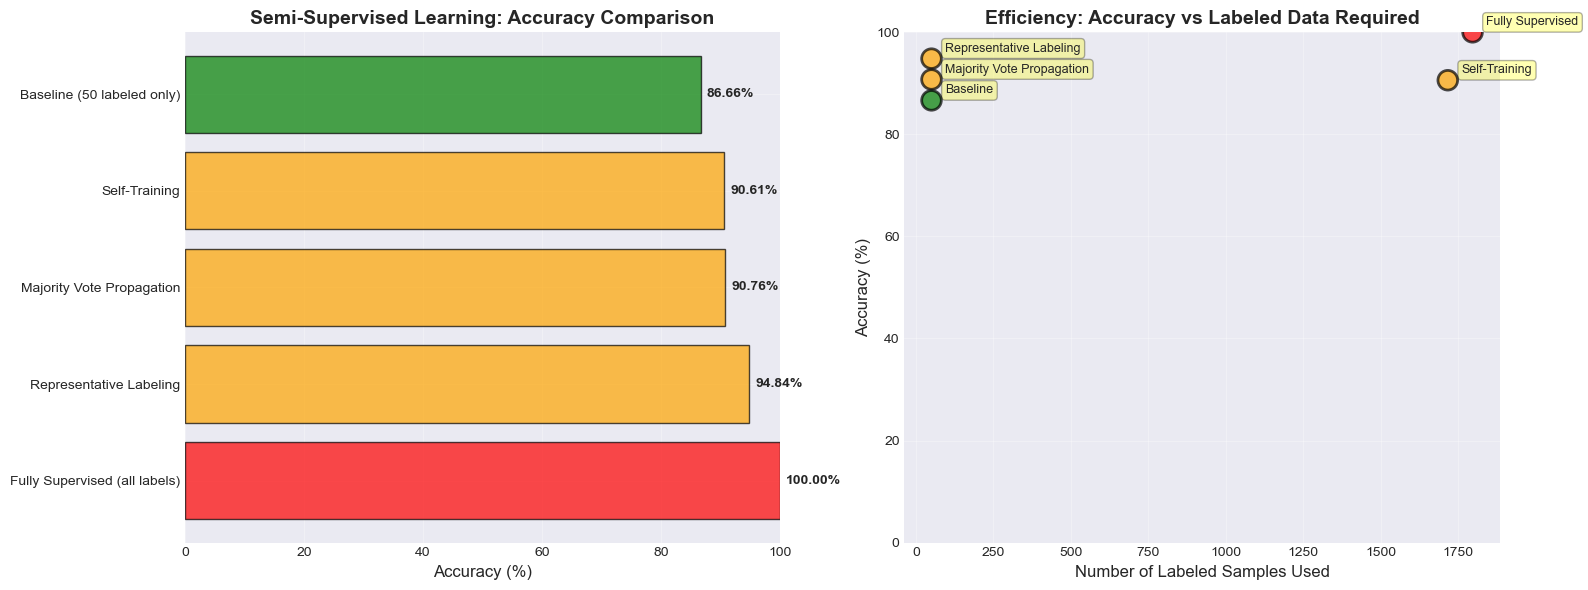


🎯 Key Insights:
   • Using only 50 labeled samples (2.8% of data):
     - Baseline accuracy: 86.66%
     - Best semi-supervised: 94.84%
     - Improvement: +8.18%

   • Semi-supervised learning achieves 94.84% of
     fully supervised performance (100.00%) with minimal labels!


In [222]:
# ============================================================================
# COMPARISON: ALL SEMI-SUPERVISED LEARNING STRATEGIES
# ============================================================================

print("\n" + "="*80)
print("📊 COMPREHENSIVE COMPARISON: SEMI-SUPERVISED LEARNING STRATEGIES")
print("="*80)

# Train fully supervised model for reference (upper bound)
lr_full_supervised = LogisticRegression(max_iter=1000, random_state=RANDOM_SEED)
lr_full_supervised.fit(X_full, y_full)
y_pred_full = lr_full_supervised.predict(X_unlabeled)
accuracy_full_supervised = accuracy_score(y_unlabeled_true, y_pred_full)

# Summary table
results_summary = {
    'Method': [
        'Baseline (50 labeled only)',
        'Representative Labeling',
        'Majority Vote Propagation',
        'Self-Training',
        'Fully Supervised (all labels)'
    ],
    'Accuracy': [
        accuracy_labeled_only,
        accuracy_rep,
        accuracy_majority,
        accuracy_self_final,
        accuracy_full_supervised
    ],
    'Labeled Samples Used': [
        n_labeled,
        n_labeled,
        n_labeled,
        len(X_train_self),
        len(X_full)
    ]
}

df_results = pd.DataFrame(results_summary)
df_results['Accuracy (%)'] = df_results['Accuracy'] * 100
df_results = df_results.sort_values('Accuracy', ascending=False)

print("\n" + df_results.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Accuracy comparison
ax = axes[0]
methods = df_results['Method'].values
accuracies = df_results['Accuracy (%)'].values
colors = ['red', 'orange', 'orange', 'orange', 'green']

bars = ax.barh(methods, accuracies, color=colors, alpha=0.7, edgecolor='black')
ax.set_xlabel('Accuracy (%)', fontsize=12)
ax.set_title('Semi-Supervised Learning: Accuracy Comparison', fontsize=14, fontweight='bold')
ax.set_xlim([0, 100])
ax.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    ax.text(acc + 1, i, f'{acc:.2f}%', va='center', fontsize=10, fontweight='bold')

# Plot 2: Efficiency (accuracy vs labeled samples)
ax = axes[1]
labeled_samples = df_results['Labeled Samples Used'].values

ax.scatter(labeled_samples, accuracies, s=200, c=colors, alpha=0.7, 
          edgecolors='black', linewidth=2, zorder=10)

for i, method in enumerate(methods):
    ax.annotate(method.split('(')[0].strip(), 
               xy=(labeled_samples[i], accuracies[i]),
               xytext=(10, 5), textcoords='offset points',
               fontsize=9, bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

ax.set_xlabel('Number of Labeled Samples Used', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Efficiency: Accuracy vs Labeled Data Required', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 100])

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("🎯 Key Insights:")
print(f"   • Using only {n_labeled} labeled samples ({n_labeled/len(X_full)*100:.1f}% of data):")
print(f"     - Baseline accuracy: {accuracy_labeled_only*100:.2f}%")
print(f"     - Best semi-supervised: {max(accuracy_rep, accuracy_majority, accuracy_self_final)*100:.2f}%")
print(f"     - Improvement: {(max(accuracy_rep, accuracy_majority, accuracy_self_final) - accuracy_labeled_only)*100:+.2f}%")
print(f"\n   • Semi-supervised learning achieves {max(accuracy_rep, accuracy_majority, accuracy_self_final)*100:.2f}% of")
print(f"     fully supervised performance ({accuracy_full_supervised*100:.2f}%) with minimal labels!")
print("="*80)

---

# Part 4: DBSCAN - Density-Based Clustering

## 📚 Introduction to DBSCAN

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is a powerful clustering algorithm that overcomes many of K-Means' limitations.

### Key Advantages Over K-Means:

✅ **Handles arbitrary shapes** - Can find non-spherical, complex clusters
✅ **Automatic outlier detection** - Identifies noise points (label = -1)
✅ **No need to specify K** - Automatically determines number of clusters
✅ **Robust to outliers** - Noise points don't affect cluster formation
✅ **Varying densities** - Better at handling clusters of different sizes

### How DBSCAN Works:

#### **Core Concepts:**

1. **ε (epsilon)**: Maximum distance for two points to be neighbors
2. **MinPts (min_samples)**: Minimum points needed to form dense region

#### **Point Types:**

🔵 **Core Point**: Has ≥ MinPts neighbors within ε distance
🟢 **Border Point**: Not a core point, but within ε of a core point
🔴 **Noise Point**: Neither core nor border (label = -1, outlier)

#### **Algorithm Steps:**

1. **Start with random point**
2. **Find all neighbors** within ε distance
3. **If core point** (≥ MinPts neighbors):
   - Create new cluster
   - Add all reachable points to cluster (density-connected)
4. **If border/noise point**: Skip or assign to existing cluster
5. **Repeat** until all points classified

### Mathematical Definition:

**Density-Reachable:**
Point q is density-reachable from p if there's a chain of core points connecting them.

**Density-Connected:**
Points p and q are density-connected if both are density-reachable from some core point.

**Cluster:**
Maximal set of density-connected points.

---

## 4.1 DBSCAN vs K-Means: Visual Comparison

Let's demonstrate DBSCAN's superiority on datasets where K-Means fails.

---

🌙 Demonstrating DBSCAN on Moons dataset...
✅ Moons dataset generated:
   • Samples: 500
   • Features: 2
   • True clusters: 2

🔧 Applying K-Means (k=2)...
   • Silhouette Score: 0.4858

🔧 Applying DBSCAN...
   • Parameters: eps=0.15, min_samples=5
   • Clusters found: 2
   • Noise points: 2 (0.4%)
   • Silhouette Score: 0.3301


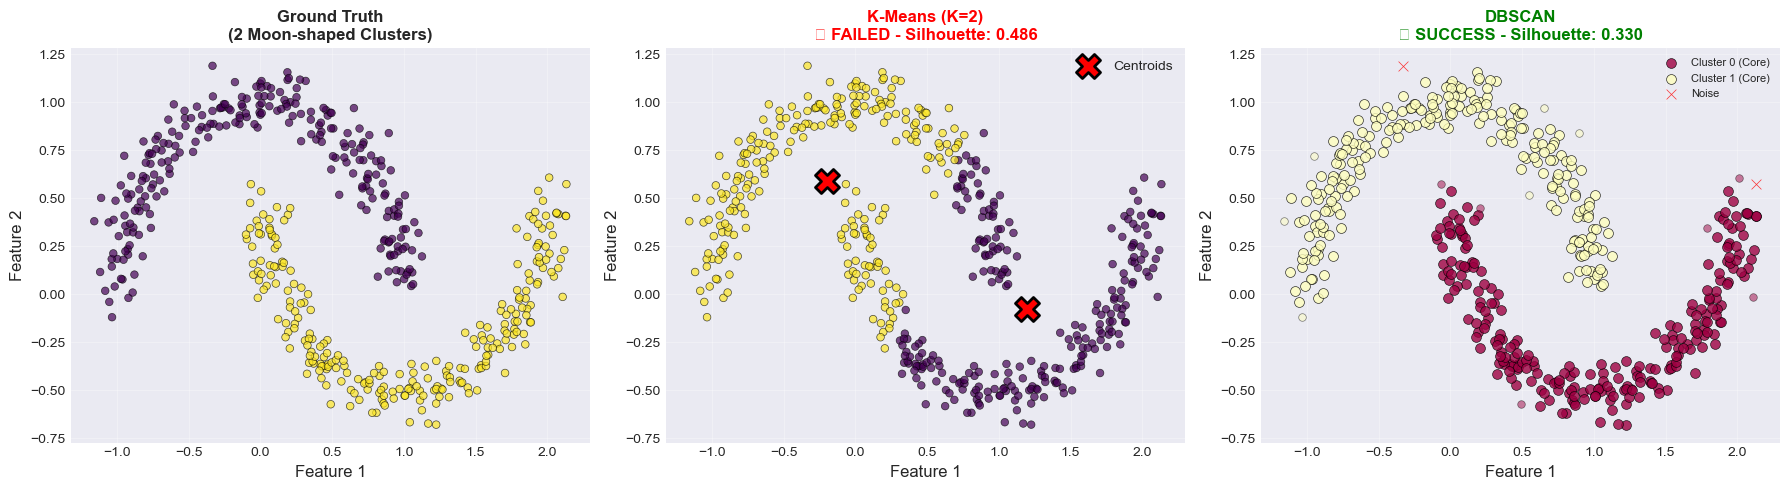


📊 Results Comparison:
   ❌ K-Means: Cannot separate moon shapes (Silhouette: 0.486)
   ✅ DBSCAN: Perfectly separates moons (Silhouette: 0.330)


In [223]:
# ============================================================================
# DBSCAN DEMONSTRATION: MOONS DATASET
# ============================================================================

print("🌙 Demonstrating DBSCAN on Moons dataset...")
print("="*80)

# Generate moons dataset (where K-Means fails)
X_moons_demo, y_moons_true = make_moons(n_samples=500, noise=0.08, random_state=RANDOM_SEED)

print(f"✅ Moons dataset generated:")
print(f"   • Samples: {X_moons_demo.shape[0]}")
print(f"   • Features: {X_moons_demo.shape[1]}")
print(f"   • True clusters: {len(np.unique(y_moons_true))}")

# Apply K-Means (will fail)
print(f"\n🔧 Applying K-Means (k=2)...")
kmeans_moons = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=RANDOM_SEED)
y_kmeans_moons = kmeans_moons.fit_predict(X_moons_demo)
sil_kmeans = silhouette_score(X_moons_demo, y_kmeans_moons)
print(f"   • Silhouette Score: {sil_kmeans:.4f}")

# Apply DBSCAN
print(f"\n🔧 Applying DBSCAN...")
dbscan_moons = DBSCAN(eps=0.15, min_samples=5)
y_dbscan_moons = dbscan_moons.fit_predict(X_moons_demo)

# DBSCAN metrics
n_clusters_dbscan = len(set(y_dbscan_moons)) - (1 if -1 in y_dbscan_moons else 0)
n_noise = list(y_dbscan_moons).count(-1)

print(f"   • Parameters: eps=0.15, min_samples=5")
print(f"   • Clusters found: {n_clusters_dbscan}")
print(f"   • Noise points: {n_noise} ({n_noise/len(X_moons_demo)*100:.1f}%)")

if n_clusters_dbscan > 1:
    # Remove noise for silhouette calculation
    mask_non_noise = y_dbscan_moons != -1
    sil_dbscan = silhouette_score(X_moons_demo[mask_non_noise], y_dbscan_moons[mask_non_noise])
    print(f"   • Silhouette Score: {sil_dbscan:.4f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Ground truth
ax = axes[0]
ax.scatter(X_moons_demo[:, 0], X_moons_demo[:, 1], c=y_moons_true, s=30, 
          alpha=0.7, cmap='viridis', edgecolors='k', linewidth=0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Ground Truth\n(2 Moon-shaped Clusters)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# K-Means result
ax = axes[1]
ax.scatter(X_moons_demo[:, 0], X_moons_demo[:, 1], c=y_kmeans_moons, s=30, 
          alpha=0.7, cmap='viridis', edgecolors='k', linewidth=0.5)
centroids = kmeans_moons.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X',
          edgecolors='black', linewidth=2, zorder=10, label='Centroids')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title(f'K-Means (K=2)\n❌ FAILED - Silhouette: {sil_kmeans:.3f}', 
            fontsize=12, fontweight='bold', color='red')
ax.legend()
ax.grid(True, alpha=0.3)

# DBSCAN result
ax = axes[2]
# Separate noise points
noise_mask = y_dbscan_moons == -1
core_samples_mask = np.zeros_like(y_dbscan_moons, dtype=bool)
core_samples_mask[dbscan_moons.core_sample_indices_] = True

# Plot non-noise points
unique_labels = set(y_dbscan_moons)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise: black crosses
        col = 'red'
        marker = 'x'
        label = 'Noise'
        class_member_mask = y_dbscan_moons == k
        xy = X_moons_demo[class_member_mask]
        ax.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=50, 
                  alpha=0.8, label=label, edgecolors='black', linewidth=0.5)
    else:
        class_member_mask = y_dbscan_moons == k
        # Core samples
        xy_core = X_moons_demo[class_member_mask & core_samples_mask]
        ax.scatter(xy_core[:, 0], xy_core[:, 1], c=[col], s=50, alpha=0.8,
                  edgecolors='k', linewidth=0.5, label=f'Cluster {k} (Core)')
        
        # Border samples
        xy_border = X_moons_demo[class_member_mask & ~core_samples_mask]
        if len(xy_border) > 0:
            ax.scatter(xy_border[:, 0], xy_border[:, 1], c=[col], s=30, 
                      alpha=0.5, edgecolors='k', linewidth=0.5)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
if n_clusters_dbscan > 1:
    ax.set_title(f'DBSCAN\n✅ SUCCESS - Silhouette: {sil_dbscan:.3f}', 
                fontsize=12, fontweight='bold', color='green')
else:
    ax.set_title(f'DBSCAN\nClusters: {n_clusters_dbscan}', 
                fontsize=12, fontweight='bold')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("📊 Results Comparison:")
print(f"   ❌ K-Means: Cannot separate moon shapes (Silhouette: {sil_kmeans:.3f})")
if n_clusters_dbscan > 1:
    print(f"   ✅ DBSCAN: Perfectly separates moons (Silhouette: {sil_dbscan:.3f})")
print("="*80)

🔬 Testing DBSCAN on various challenging datasets...

🔧 Processing: Moons
   • K-Means clusters: 2
   • DBSCAN clusters: 2
   • DBSCAN noise: 5 points

🔧 Processing: Circles
   • K-Means clusters: 2
   • DBSCAN clusters: 2
   • DBSCAN noise: 0 points

🔧 Processing: Varied Density
   • K-Means clusters: 3
   • DBSCAN clusters: 3
   • DBSCAN noise: 20 points


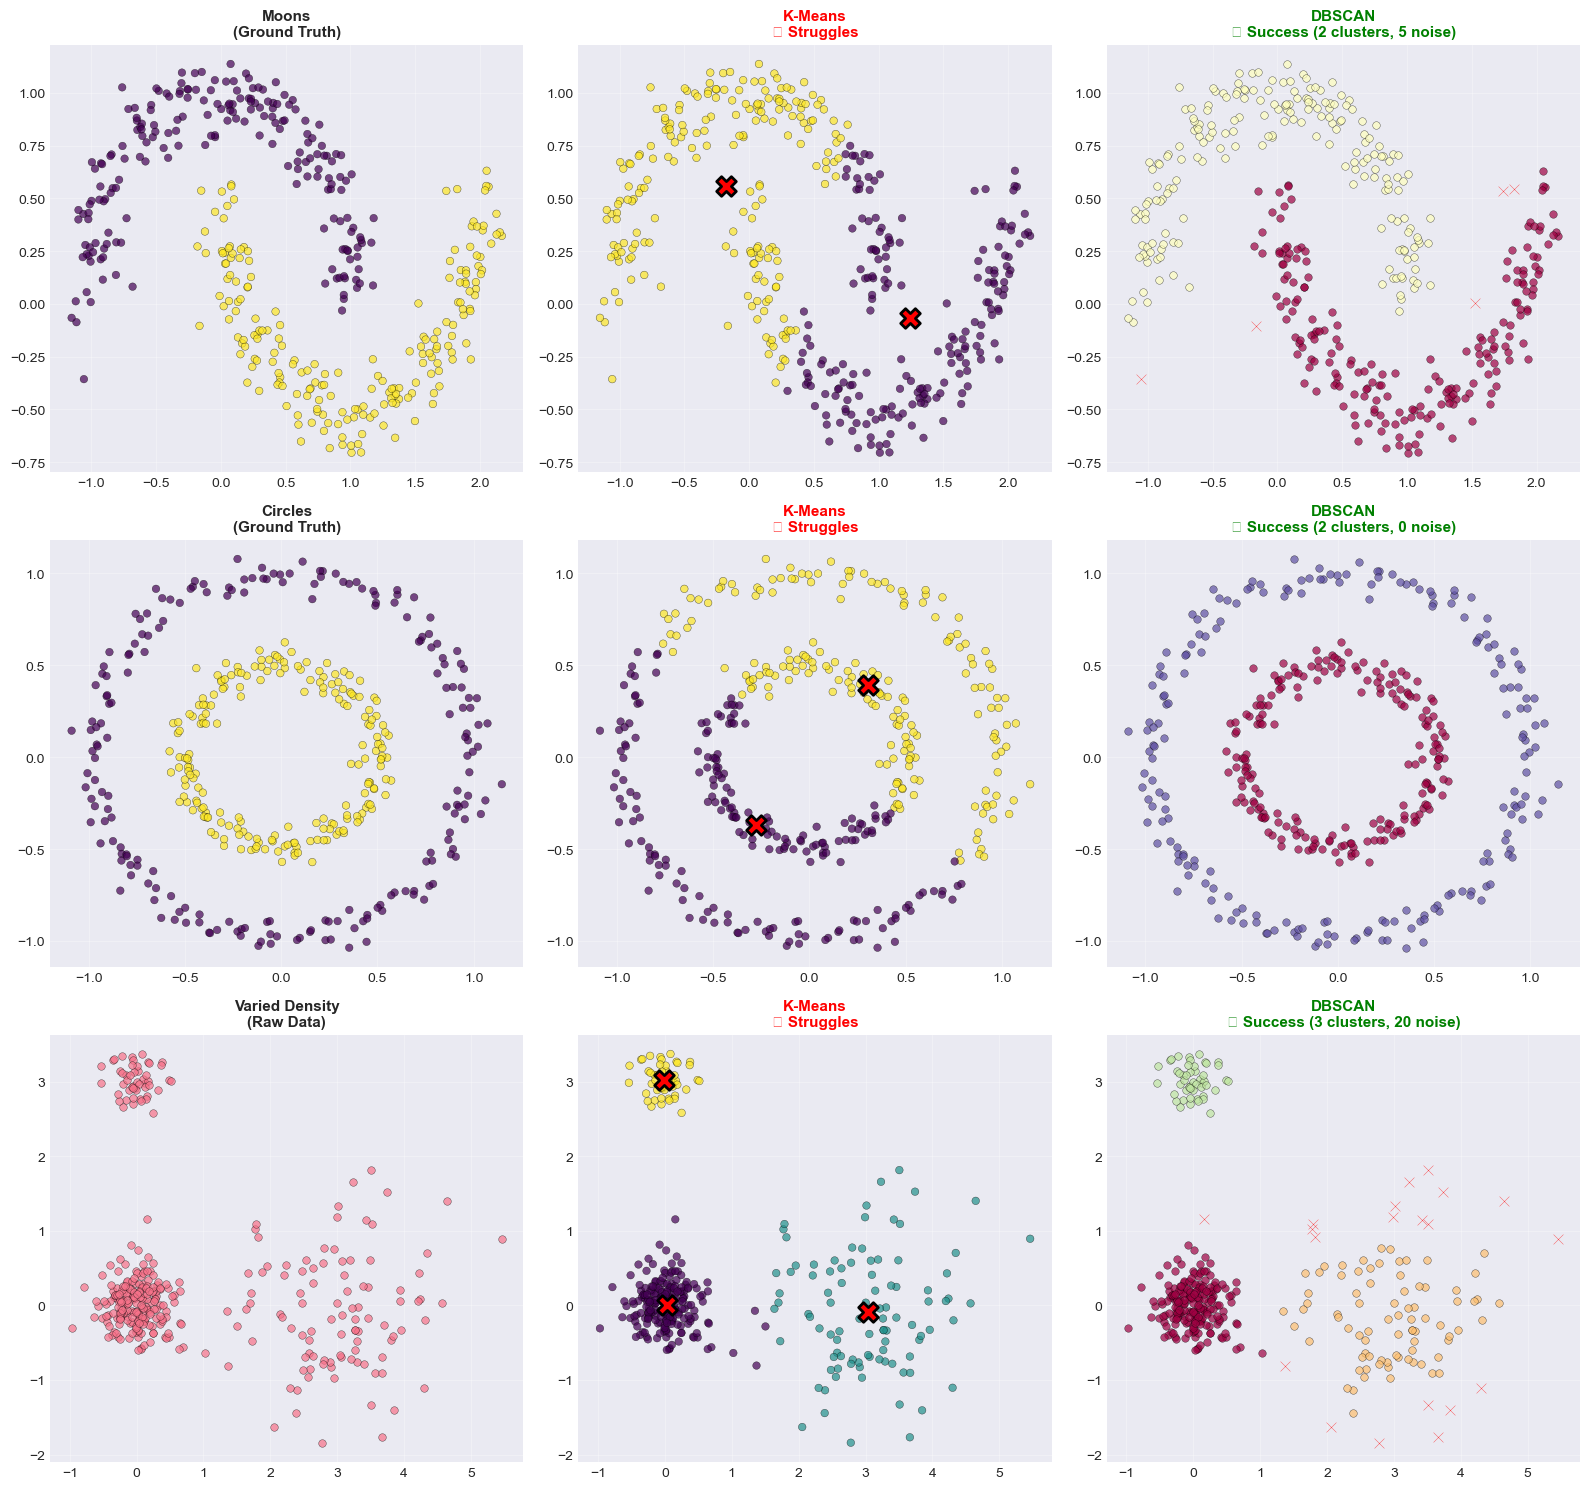


✅ DBSCAN successfully handles all challenging cases!


In [224]:
# ============================================================================
# DBSCAN ON MULTIPLE CHALLENGING DATASETS
# ============================================================================

print("🔬 Testing DBSCAN on various challenging datasets...")
print("="*80)

# Prepare datasets
datasets_dbscan = [
    (X_moons, y_moons, "Moons", {'eps': 0.15, 'min_samples': 5}),
    (X_circles, y_circles, "Circles", {'eps': 0.15, 'min_samples': 5}),
]

# Add varied density dataset
np.random.seed(RANDOM_SEED)
X_varied_density = np.vstack([
    np.random.randn(200, 2) * 0.3,
    np.random.randn(100, 2) * 0.8 + [3, 0],
    np.random.randn(50, 2) * 0.2 + [0, 3]
])
datasets_dbscan.append((X_varied_density, None, "Varied Density", {'eps': 0.4, 'min_samples': 5}))

# Visualize
fig, axes = plt.subplots(len(datasets_dbscan), 3, figsize=(16, 5*len(datasets_dbscan)))

for idx, (X, y_true, name, params) in enumerate(datasets_dbscan):
    print(f"\n🔧 Processing: {name}")
    
    # K-Means
    n_clusters_kmeans = 2 if y_true is not None else 3
    kmeans_test = KMeans(n_clusters=n_clusters_kmeans, init='k-means++', 
                        n_init=10, random_state=RANDOM_SEED)
    y_kmeans_test = kmeans_test.fit_predict(X)
    
    # DBSCAN
    dbscan_test = DBSCAN(**params)
    y_dbscan_test = dbscan_test.fit_predict(X)
    
    n_clusters_db = len(set(y_dbscan_test)) - (1 if -1 in y_dbscan_test else 0)
    n_noise_db = list(y_dbscan_test).count(-1)
    
    print(f"   • K-Means clusters: {n_clusters_kmeans}")
    print(f"   • DBSCAN clusters: {n_clusters_db}")
    print(f"   • DBSCAN noise: {n_noise_db} points")
    
    # Plot 1: Ground truth or raw
    ax = axes[idx, 0]
    if y_true is not None:
        ax.scatter(X[:, 0], X[:, 1], c=y_true, s=30, alpha=0.7,
                  cmap='viridis', edgecolors='k', linewidth=0.3)
        ax.set_title(f'{name}\n(Ground Truth)', fontsize=11, fontweight='bold')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=30, alpha=0.7, edgecolors='k', linewidth=0.3)
        ax.set_title(f'{name}\n(Raw Data)', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Plot 2: K-Means
    ax = axes[idx, 1]
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans_test, s=30, alpha=0.7,
              cmap='viridis', edgecolors='k', linewidth=0.3)
    centroids = kmeans_test.cluster_centers_
    ax.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', 
              marker='X', edgecolors='black', linewidth=2, zorder=10)
    ax.set_title(f'K-Means\n❌ Struggles', fontsize=11, fontweight='bold', color='red')
    ax.grid(True, alpha=0.3)
    
    # Plot 3: DBSCAN
    ax = axes[idx, 2]
    unique_labels = set(y_dbscan_test)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = 'red'
            marker = 'x'
            s = 50
        else:
            marker = 'o'
            s = 30
        
        class_member_mask = y_dbscan_test == k
        xy = X[class_member_mask]
        ax.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=s,
                  alpha=0.7, edgecolors='k', linewidth=0.3)
    
    ax.set_title(f'DBSCAN\n✅ Success ({n_clusters_db} clusters, {n_noise_db} noise)', 
                fontsize=11, fontweight='bold', color='green')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ DBSCAN successfully handles all challenging cases!")
print("="*80)

## 4.2 Understanding DBSCAN Parameters

Choosing the right parameters for DBSCAN is crucial for good clustering results.

### **Parameter 1: eps (ε)**
- **Definition**: Maximum distance between two points to be neighbors
- **Too Small**: Many small clusters, many noise points
- **Too Large**: All points merge into one cluster
- **How to Choose**: 
  - Plot k-distance graph (distance to k-th nearest neighbor)
  - Look for "elbow" point
  - Start with average distance to k-th nearest neighbor

### **Parameter 2: min_samples (MinPts)**
- **Definition**: Minimum points required to form dense region
- **Rule of Thumb**: `min_samples ≥ D + 1` (D = dimensionality)
- **Common Values**: 5-10 for 2D data, higher for high-dimensional
- **Effect**:
  - Larger → Fewer, denser clusters
  - Smaller → More clusters, less noise filtering

### **Parameter Selection Strategy:**

1. **For 2D data**: 
   - Start with `min_samples = 5`
   - Vary `eps` and observe results

2. **For high-D data**:
   - Use `min_samples = 2 * D`
   - Compute k-distance graph

3. **Domain knowledge**:
   - Minimum expected cluster size → `min_samples`
   - Maximum point separation → `eps`

---

🔍 Analyzing DBSCAN parameter sensitivity...

📊 Testing different eps values (min_samples=5):

   eps=0.05:
      • Clusters: 24
      • Noise: 328 (65.6%)

   eps=0.10:
      • Clusters: 3
      • Noise: 22 (4.4%)

   eps=0.15:
      • Clusters: 2
      • Noise: 2 (0.4%)

   eps=0.20:
      • Clusters: 2
      • Noise: 0 (0.0%)

   eps=0.30:
      • Clusters: 1
      • Noise: 0 (0.0%)

   eps=0.50:
      • Clusters: 1
      • Noise: 0 (0.0%)


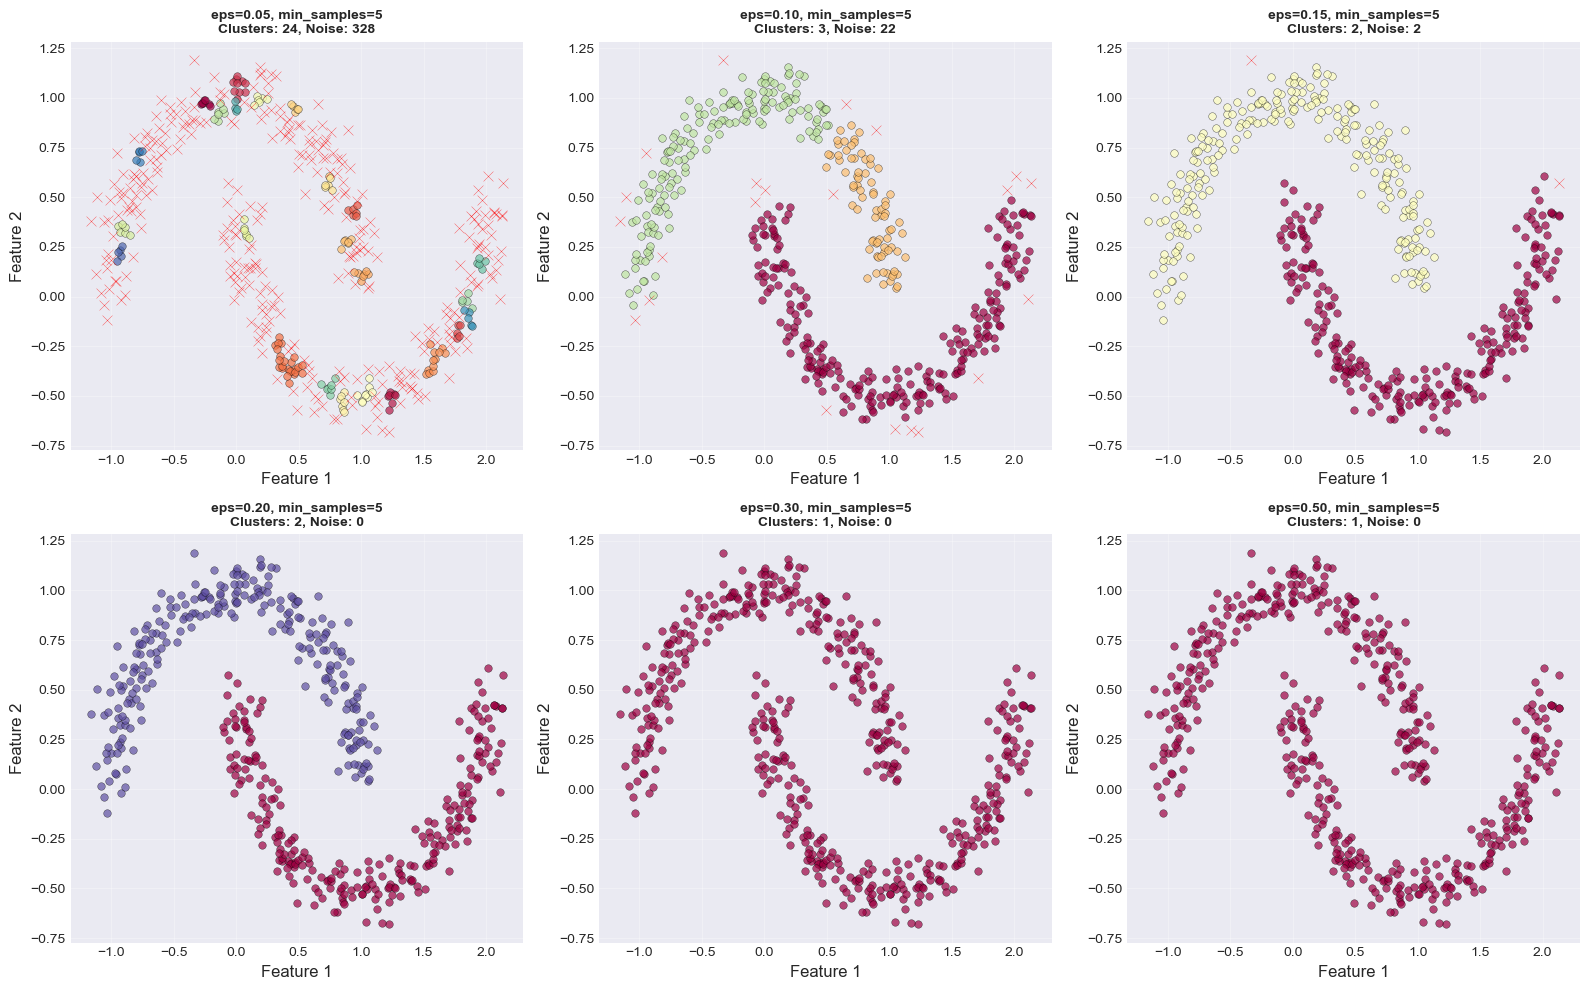


📊 Observations:
   • eps too small → Many small clusters + high noise
   • eps optimal → Correct cluster separation
   • eps too large → Clusters merge together


In [225]:
# ============================================================================
# DBSCAN PARAMETER SENSITIVITY ANALYSIS
# ============================================================================

print("🔍 Analyzing DBSCAN parameter sensitivity...")
print("="*80)

# Use moons dataset
X_param_test = X_moons_demo.copy()

# Test different eps values
eps_values = [0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
min_samples_fixed = 5

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

print("\n📊 Testing different eps values (min_samples=5):")

for idx, eps in enumerate(eps_values):
    dbscan_param = DBSCAN(eps=eps, min_samples=min_samples_fixed)
    y_param = dbscan_param.fit_predict(X_param_test)
    
    n_clusters = len(set(y_param)) - (1 if -1 in y_param else 0)
    n_noise = list(y_param).count(-1)
    
    print(f"\n   eps={eps:.2f}:")
    print(f"      • Clusters: {n_clusters}")
    print(f"      • Noise: {n_noise} ({n_noise/len(X_param_test)*100:.1f}%)")
    
    # Plot
    ax = axes[idx]
    unique_labels = set(y_param)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = 'red'
            marker = 'x'
            s = 50
        else:
            marker = 'o'
            s = 30
        
        class_member_mask = y_param == k
        xy = X_param_test[class_member_mask]
        ax.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=s,
                  alpha=0.7, edgecolors='k', linewidth=0.3)
    
    ax.set_title(f'eps={eps:.2f}, min_samples={min_samples_fixed}\n'
                f'Clusters: {n_clusters}, Noise: {n_noise}',
                fontsize=10, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("📊 Observations:")
print("   • eps too small → Many small clusters + high noise")
print("   • eps optimal → Correct cluster separation")
print("   • eps too large → Clusters merge together")
print("="*80)

---

# Part 5: Gaussian Mixture Models (GMM)

## 📚 Introduction to Gaussian Mixture Models

**Gaussian Mixture Models** are probabilistic clustering algorithms that assume data is generated from a mixture of several Gaussian distributions. GMM provides **soft clustering** where each point has a probability of belonging to each cluster.

### Key Differences from K-Means:

| Feature | K-Means | GMM |
|---------|---------|-----|
| **Clustering Type** | Hard (each point → 1 cluster) | Soft (probabilities for all clusters) |
| **Cluster Shape** | Spherical only | Elliptical (any covariance) |
| **Mathematical Model** | Distance-based | Probabilistic |
| **Output** | Cluster labels | Probabilities + labels |
| **Flexibility** | Low | High (covariance types) |

### Advantages of GMM:

✅ **Soft clustering**: Provides probabilities, not just hard assignments
✅ **Flexible shapes**: Handles elliptical clusters with different orientations
✅ **Density estimation**: Can generate new samples from learned distribution
✅ **Anomaly detection**: Low probability points are anomalies
✅ **Model selection**: BIC/AIC for optimal number of components

---

## 5.1 Mathematical Foundation

### Gaussian Distribution (Single):

For a single Gaussian in D dimensions:

$$p(\mathbf{x}) = \frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x}-\mu)^T\Sigma^{-1}(\mathbf{x}-\mu)\right)$$

Where:
- $\mu$ = mean vector
- $\Sigma$ = covariance matrix
- $|\Sigma|$ = determinant of covariance matrix

### Mixture of Gaussians:

GMM assumes data comes from K Gaussian distributions:

$$p(\mathbf{x}) = \sum_{k=1}^{K} \phi_k \mathcal{N}(\mathbf{x}|\mu_k, \Sigma_k)$$

Where:
- $K$ = number of components (clusters)
- $\phi_k$ = mixing coefficient (weight) for component k, $\sum_{k=1}^{K}\phi_k = 1$
- $\mu_k$ = mean of component k
- $\Sigma_k$ = covariance matrix of component k

### Expectation-Maximization (EM) Algorithm:

GMM is trained using the EM algorithm:

**E-Step (Expectation):**
Calculate responsibility $\gamma_{ik}$ = probability that point i belongs to cluster k

$$\gamma_{ik} = \frac{\phi_k \mathcal{N}(\mathbf{x}_i|\mu_k, \Sigma_k)}{\sum_{j=1}^{K} \phi_j \mathcal{N}(\mathbf{x}_i|\mu_j, \Sigma_j)}$$

**M-Step (Maximization):**
Update parameters to maximize likelihood:

$$\phi_k = \frac{1}{N}\sum_{i=1}^{N}\gamma_{ik}$$

$$\mu_k = \frac{\sum_{i=1}^{N}\gamma_{ik}\mathbf{x}_i}{\sum_{i=1}^{N}\gamma_{ik}}$$

$$\Sigma_k = \frac{\sum_{i=1}^{N}\gamma_{ik}(\mathbf{x}_i - \mu_k)(\mathbf{x}_i - \mu_k)^T}{\sum_{i=1}^{N}\gamma_{ik}}$$

---

## 5.2 Covariance Types

GMM supports different covariance structures:

### **1. "full"** (Default)
- Each component has its own general covariance matrix
- Most flexible, can model any ellipsoid
- **Parameters**: $K \times D \times D$ covariance matrices
- **Use when**: Clusters have different shapes and orientations

### **2. "tied"**
- All components share the same covariance matrix
- All clusters have same shape, different positions
- **Parameters**: $1 \times D \times D$ covariance matrix
- **Use when**: Clusters have similar shapes

### **3. "diag"**
- Diagonal covariance matrices (axes-aligned ellipsoids)
- No correlation between features
- **Parameters**: $K \times D$ variances
- **Use when**: Features are independent

### **4. "spherical"**
- Single variance per component (circles/spheres)
- Similar to K-Means but probabilistic
- **Parameters**: $K$ variances (scalars)
- **Use when**: Clusters are roughly circular

**Complexity vs Flexibility Trade-off:**
`spherical < tied < diag < full`

---

In [226]:
# ============================================================================
# GAUSSIAN MIXTURE MODEL: BASIC IMPLEMENTATION
# ============================================================================

print("🎲 Demonstrating Gaussian Mixture Models...")
print("="*80)

# Generate data with elliptical clusters
np.random.seed(RANDOM_SEED)
n_samples = 500

# Cluster 1: Horizontal ellipse
mean1 = [0, 0]
cov1 = [[2, 0.5], [0.5, 0.5]]
X1 = np.random.multivariate_normal(mean1, cov1, n_samples)

# Cluster 2: Vertical ellipse
mean2 = [4, 4]
cov2 = [[0.5, 0], [0, 2]]
X2 = np.random.multivariate_normal(mean2, cov2, n_samples)

# Cluster 3: Diagonal ellipse
mean3 = [0, 4]
cov3 = [[1, 0.8], [0.8, 1]]
X3 = np.random.multivariate_normal(mean3, cov3, n_samples)

X_gmm = np.vstack([X1, X2, X3])
y_gmm_true = np.hstack([np.zeros(n_samples), np.ones(n_samples), np.full(n_samples, 2)])

print(f"✅ Elliptical clusters generated:")
print(f"   • Total samples: {X_gmm.shape[0]}")
print(f"   • Features: {X_gmm.shape[1]}")
print(f"   • True clusters: 3 (with different elliptical shapes)")

# Apply K-Means
print(f"\n🔧 Applying K-Means (k=3)...")
kmeans_gmm = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=RANDOM_SEED)
y_kmeans_gmm = kmeans_gmm.fit_predict(X_gmm)
sil_kmeans_gmm = silhouette_score(X_gmm, y_kmeans_gmm)
print(f"   • Silhouette Score: {sil_kmeans_gmm:.4f}")
print(f"   • Inertia: {kmeans_gmm.inertia_:.2f}")

# Apply GMM
print(f"\n🔧 Applying GMM (n_components=3, covariance_type='full')...")
gmm = GaussianMixture(n_components=3, covariance_type='full', 
                      n_init=10, random_state=RANDOM_SEED)
gmm.fit(X_gmm)
y_gmm = gmm.predict(X_gmm)
sil_gmm = silhouette_score(X_gmm, y_gmm)

print(f"   • Silhouette Score: {sil_gmm:.4f}")
print(f"   • Log-Likelihood: {gmm.score(X_gmm) * len(X_gmm):.2f}")
print(f"   • Converged: {gmm.converged_}")
print(f"   • Iterations: {gmm.n_iter_}")

# Get soft clustering probabilities
y_gmm_proba = gmm.predict_proba(X_gmm)
print(f"\n📊 Soft Clustering Probabilities (first 5 samples):")
print("   Sample | P(Cluster 0) | P(Cluster 1) | P(Cluster 2) | Assigned")
print("   " + "-"*65)
for i in range(5):
    probs = " | ".join([f"{p:12.4f}" for p in y_gmm_proba[i]])
    print(f"     {i:2d}   | {probs} |    {y_gmm[i]}")

print("="*80)

🎲 Demonstrating Gaussian Mixture Models...
✅ Elliptical clusters generated:
   • Total samples: 1500
   • Features: 2
   • True clusters: 3 (with different elliptical shapes)

🔧 Applying K-Means (k=3)...
   • Silhouette Score: 0.5572
   • Inertia: 3205.60

🔧 Applying GMM (n_components=3, covariance_type='full')...
   • Silhouette Score: 0.5558
   • Log-Likelihood: -5491.47
   • Converged: True
   • Iterations: 3

📊 Soft Clustering Probabilities (first 5 samples):
   Sample | P(Cluster 0) | P(Cluster 1) | P(Cluster 2) | Assigned
   -----------------------------------------------------------------
      0   |       0.0000 |       0.0000 |       1.0000 |    2
      1   |       0.0000 |       0.0003 |       0.9997 |    2
      2   |       0.0000 |       0.0000 |       1.0000 |    2
      3   |       0.0000 |       0.0001 |       0.9999 |    2
      4   |       0.0000 |       0.0000 |       1.0000 |    2


📊 Visualizing GMM vs K-Means on elliptical clusters...


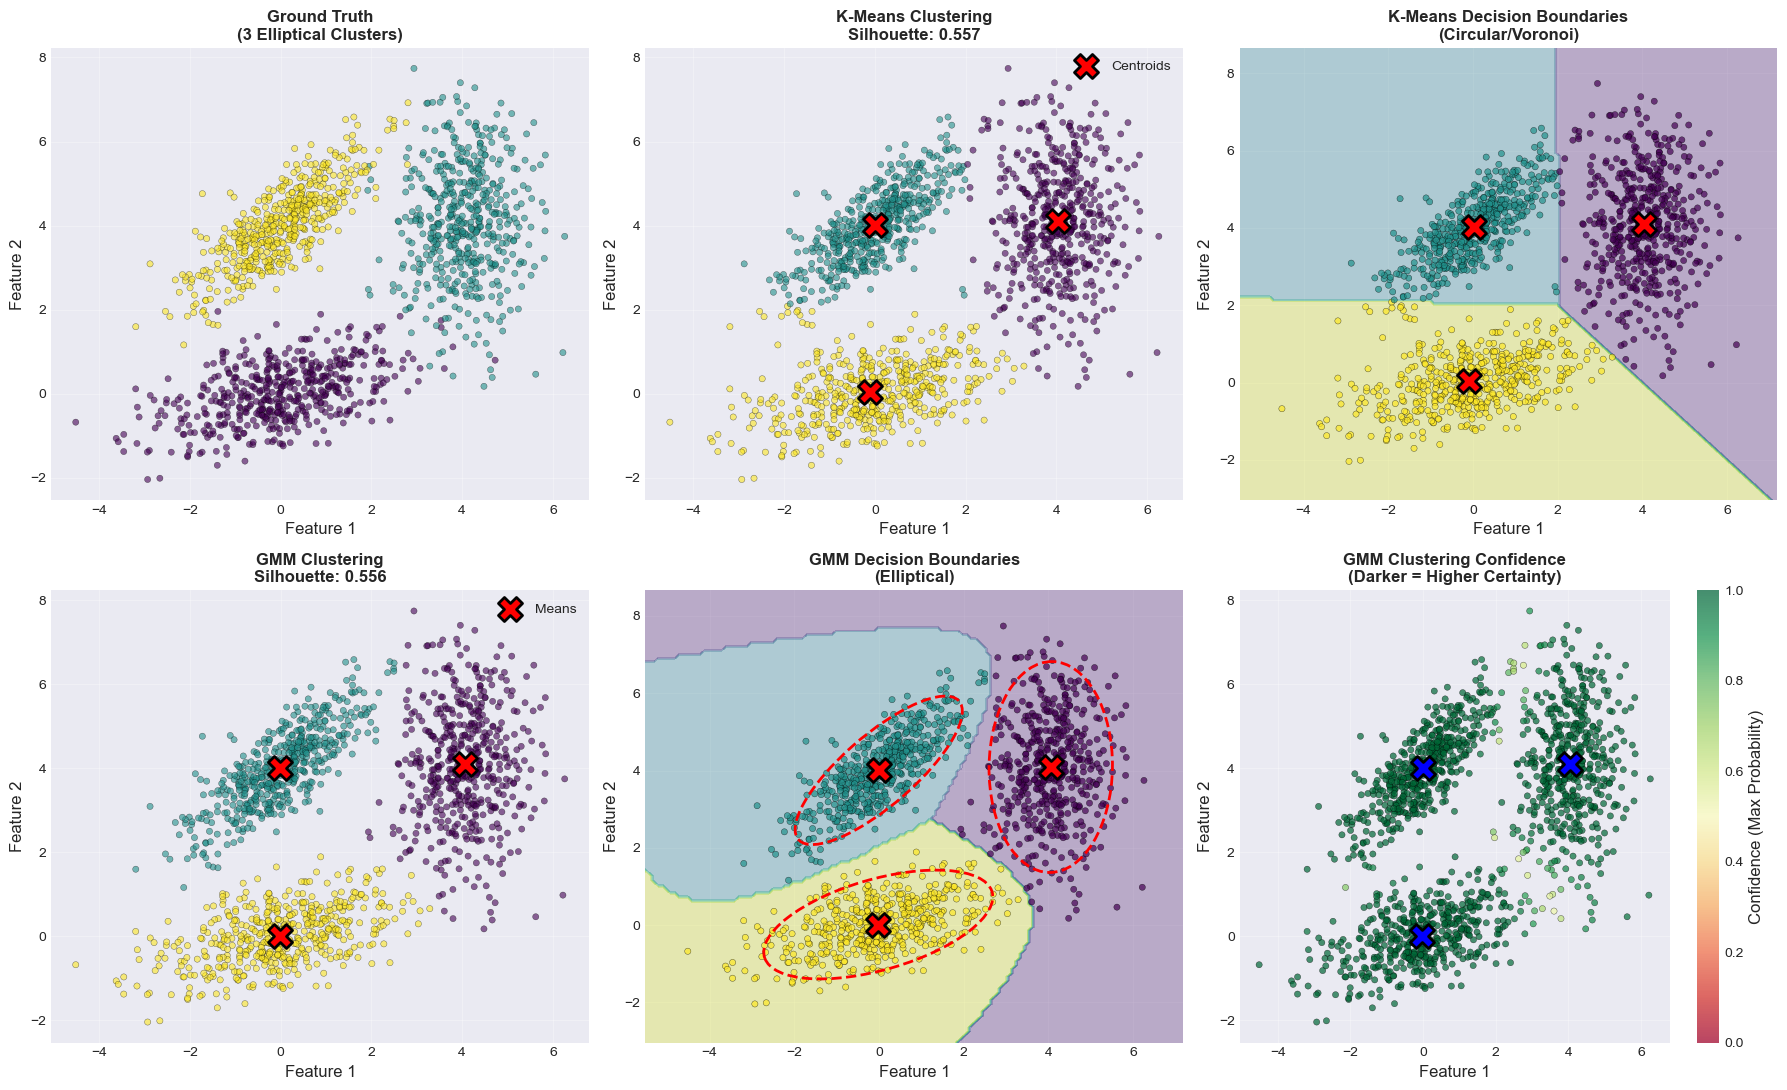

📊 Key Observations:
   ❌ K-Means: Uses circular decision boundaries, doesn't capture elliptical shapes
   ✅ GMM: Captures elliptical cluster shapes perfectly
   ✅ GMM: Provides probability/confidence for each assignment


In [227]:
# ============================================================================
# VISUALIZE GMM VS K-MEANS ON ELLIPTICAL CLUSTERS
# ============================================================================

print("📊 Visualizing GMM vs K-Means on elliptical clusters...")

fig, axes = plt.subplots(2, 3, figsize=(18, 11))

# Row 1: K-Means
# Plot 1: Ground truth
ax = axes[0, 0]
ax.scatter(X_gmm[:, 0], X_gmm[:, 1], c=y_gmm_true, s=20, alpha=0.6,
          cmap='viridis', edgecolors='k', linewidth=0.3)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Ground Truth\n(3 Elliptical Clusters)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Plot 2: K-Means clustering
ax = axes[0, 1]
ax.scatter(X_gmm[:, 0], X_gmm[:, 1], c=y_kmeans_gmm, s=20, alpha=0.6,
          cmap='viridis', edgecolors='k', linewidth=0.3)
centroids_gmm = kmeans_gmm.cluster_centers_
ax.scatter(centroids_gmm[:, 0], centroids_gmm[:, 1], s=300, c='red',
          marker='X', edgecolors='black', linewidth=2, zorder=10, label='Centroids')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title(f'K-Means Clustering\nSilhouette: {sil_kmeans_gmm:.3f}', 
            fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: K-Means decision boundaries
ax = axes[0, 2]
h = 0.1
x_min, x_max = X_gmm[:, 0].min() - 1, X_gmm[:, 0].max() + 1
y_min, y_max = X_gmm[:, 1].min() - 1, X_gmm[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z_kmeans = kmeans_gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_kmeans = Z_kmeans.reshape(xx.shape)

ax.contourf(xx, yy, Z_kmeans, alpha=0.3, cmap='viridis')
ax.scatter(X_gmm[:, 0], X_gmm[:, 1], c=y_kmeans_gmm, s=20, alpha=0.7,
          cmap='viridis', edgecolors='k', linewidth=0.3)
ax.scatter(centroids_gmm[:, 0], centroids_gmm[:, 1], s=300, c='red',
          marker='X', edgecolors='black', linewidth=2, zorder=10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('K-Means Decision Boundaries\n(Circular/Voronoi)', 
            fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Row 2: GMM
# Plot 4: GMM clustering
ax = axes[1, 0]
ax.scatter(X_gmm[:, 0], X_gmm[:, 1], c=y_gmm, s=20, alpha=0.6,
          cmap='viridis', edgecolors='k', linewidth=0.3)
ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=300, c='red',
          marker='X', edgecolors='black', linewidth=2, zorder=10, label='Means')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title(f'GMM Clustering\nSilhouette: {sil_gmm:.3f}', 
            fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 5: GMM decision boundaries with ellipses
ax = axes[1, 1]
Z_gmm = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_gmm = Z_gmm.reshape(xx.shape)

ax.contourf(xx, yy, Z_gmm, alpha=0.3, cmap='viridis')
ax.scatter(X_gmm[:, 0], X_gmm[:, 1], c=y_gmm, s=20, alpha=0.7,
          cmap='viridis', edgecolors='k', linewidth=0.3)

# Draw ellipses for GMM components
from matplotlib.patches import Ellipse

for i in range(gmm.n_components):
    mean = gmm.means_[i]
    covariance = gmm.covariances_[i]
    
    # Eigenvalues and eigenvectors for ellipse
    eigenvalues, eigenvectors = np.linalg.eigh(covariance)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(eigenvalues) * 2  # 2 std devs
    
    ellipse = Ellipse(mean, width, height, angle=angle,
                     facecolor='none', edgecolor='red', linewidth=2, linestyle='--')
    ax.add_patch(ellipse)

ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=300, c='red',
          marker='X', edgecolors='black', linewidth=2, zorder=10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('GMM Decision Boundaries\n(Elliptical)', 
            fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Plot 6: GMM probabilities (uncertainty visualization)
ax = axes[1, 2]
# Use max probability as confidence
confidence = y_gmm_proba.max(axis=1)
scatter = ax.scatter(X_gmm[:, 0], X_gmm[:, 1], c=confidence, s=20, 
                    alpha=0.7, cmap='RdYlGn', edgecolors='k', linewidth=0.3,
                    vmin=0, vmax=1)
plt.colorbar(scatter, ax=ax, label='Confidence (Max Probability)')
ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=300, c='blue',
          marker='X', edgecolors='black', linewidth=2, zorder=10)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('GMM Clustering Confidence\n(Darker = Higher Certainty)', 
            fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("="*80)
print("📊 Key Observations:")
print("   ❌ K-Means: Uses circular decision boundaries, doesn't capture elliptical shapes")
print("   ✅ GMM: Captures elliptical cluster shapes perfectly")
print("   ✅ GMM: Provides probability/confidence for each assignment")
print("="*80)

## 5.3 Comparing Covariance Types

Let's compare the 4 different covariance types and understand when to use each.

---

🔬 Comparing different GMM covariance types...

🔧 Testing covariance_type='full'...
   • Silhouette: 0.5558
   • Log-Likelihood: -5491.47
   • BIC: 11107.26 (lower is better)
   • AIC: 11016.94 (lower is better)

🔧 Testing covariance_type='tied'...
   • Silhouette: 0.5553
   • Log-Likelihood: -5883.78
   • BIC: 11848.00 (lower is better)
   • AIC: 11789.56 (lower is better)

🔧 Testing covariance_type='diag'...
   • Silhouette: 0.5571
   • Log-Likelihood: -5770.60
   • BIC: 11643.58 (lower is better)
   • AIC: 11569.20 (lower is better)

🔧 Testing covariance_type='spherical'...
   • Silhouette: 0.5344
   • Log-Likelihood: -5891.91
   • BIC: 11864.26 (lower is better)
   • AIC: 11805.82 (lower is better)


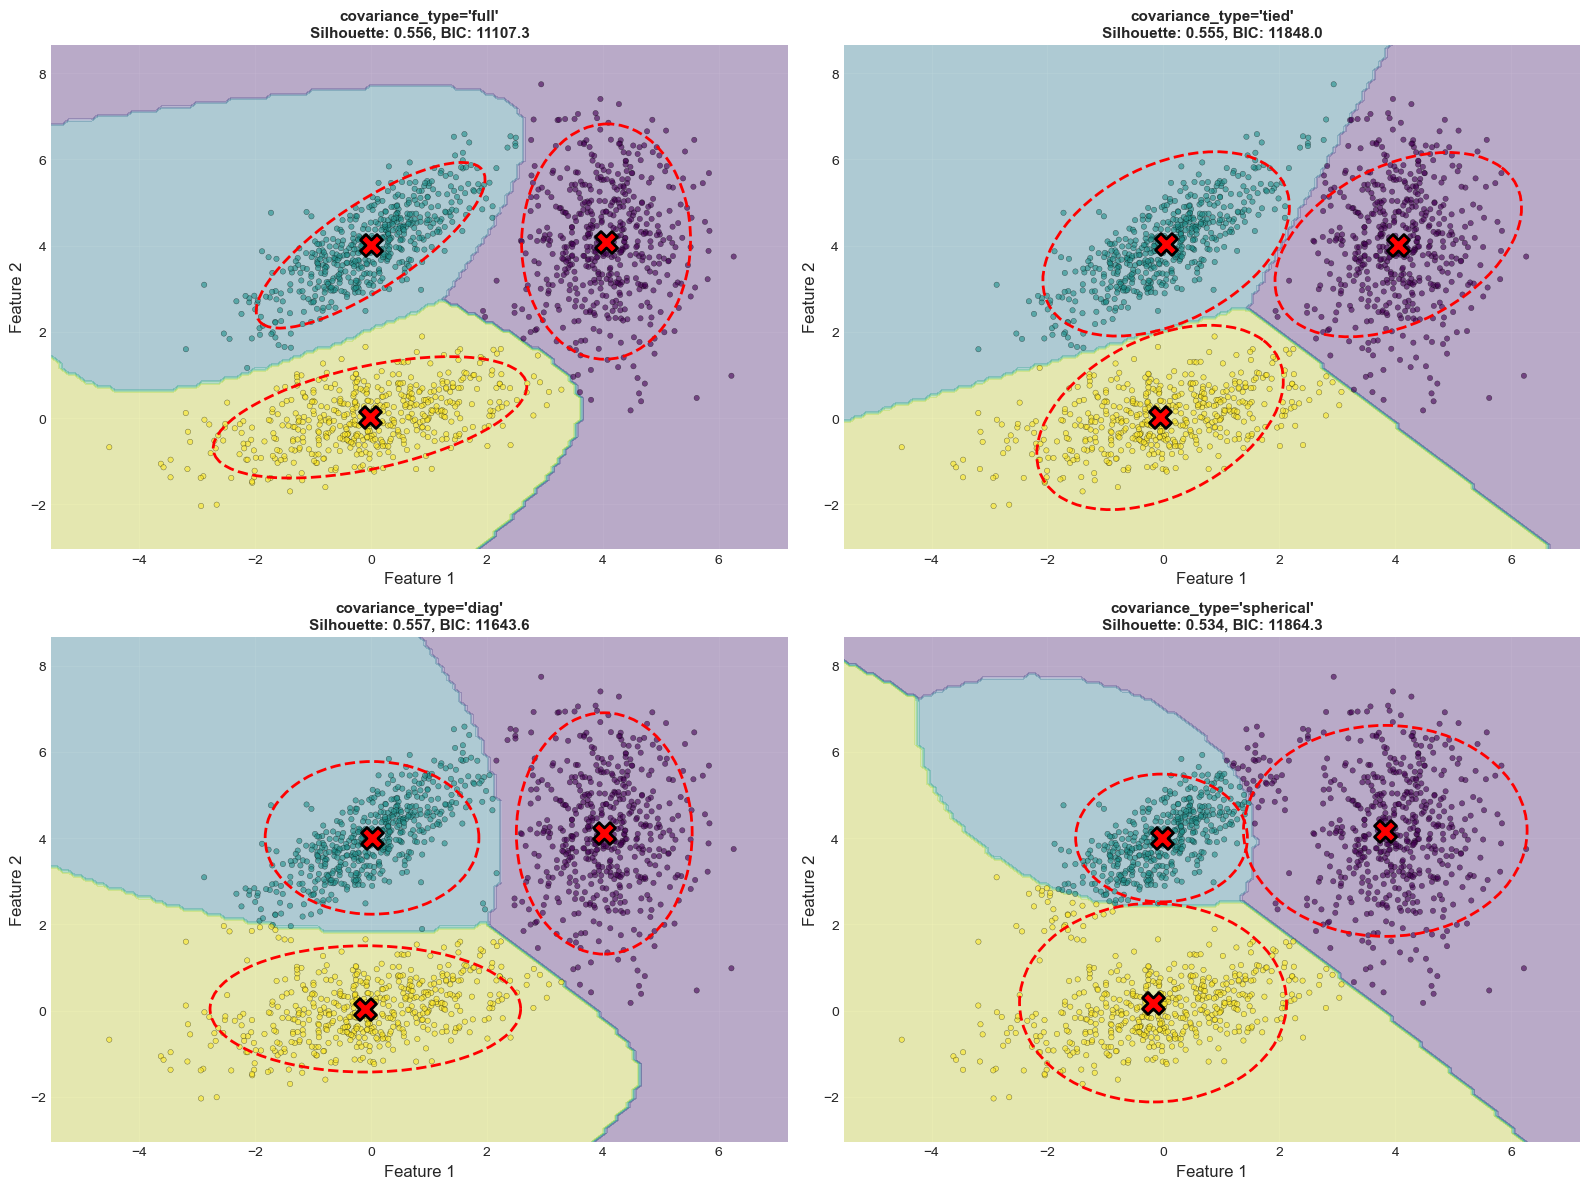


📊 COVARIANCE TYPES COMPARISON
           silhouette  log_likelihood        bic        aic  n_iter
full           0.5558      -5491.4683 11107.2613 11016.9366  3.0000
diag           0.5571      -5770.5994 11643.5839 11569.1988  2.0000
tied           0.5553      -5883.7777 11848.0007 11789.5553  4.0000
spherical      0.5344      -5891.9090 11864.2635 11805.8181  5.0000

🏆 Best Model (lowest BIC): full


In [228]:
# ============================================================================
# COMPARE GMM COVARIANCE TYPES
# ============================================================================

print("🔬 Comparing different GMM covariance types...")
print("="*80)

covariance_types = ['full', 'tied', 'diag', 'spherical']
results_cov = {}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, cov_type in enumerate(covariance_types):
    print(f"\n🔧 Testing covariance_type='{cov_type}'...")
    
    # Fit GMM
    gmm_cov = GaussianMixture(n_components=3, covariance_type=cov_type,
                              n_init=10, random_state=RANDOM_SEED)
    gmm_cov.fit(X_gmm)
    y_cov = gmm_cov.predict(X_gmm)
    
    # Metrics
    sil_cov = silhouette_score(X_gmm, y_cov)
    log_likelihood = gmm_cov.score(X_gmm) * len(X_gmm)
    bic = gmm_cov.bic(X_gmm)
    aic = gmm_cov.aic(X_gmm)
    
    results_cov[cov_type] = {
        'silhouette': sil_cov,
        'log_likelihood': log_likelihood,
        'bic': bic,
        'aic': aic,
        'n_iter': gmm_cov.n_iter_
    }
    
    print(f"   • Silhouette: {sil_cov:.4f}")
    print(f"   • Log-Likelihood: {log_likelihood:.2f}")
    print(f"   • BIC: {bic:.2f} (lower is better)")
    print(f"   • AIC: {aic:.2f} (lower is better)")
    
    # Visualize
    ax = axes[idx]
    
    # Decision boundaries
    h = 0.1
    x_min, x_max = X_gmm[:, 0].min() - 1, X_gmm[:, 0].max() + 1
    y_min, y_max = X_gmm[:, 1].min() - 1, X_gmm[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z_cov = gmm_cov.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_cov = Z_cov.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z_cov, alpha=0.3, cmap='viridis')
    ax.scatter(X_gmm[:, 0], X_gmm[:, 1], c=y_cov, s=15, alpha=0.6,
              cmap='viridis', edgecolors='k', linewidth=0.3)
    
    # Draw ellipses
    for i in range(gmm_cov.n_components):
        mean = gmm_cov.means_[i]
        
        if cov_type == 'full':
            covariance = gmm_cov.covariances_[i]
        elif cov_type == 'tied':
            covariance = gmm_cov.covariances_
        elif cov_type == 'diag':
            covariance = np.diag(gmm_cov.covariances_[i])
        else:  # spherical
            covariance = np.eye(2) * gmm_cov.covariances_[i]
        
        eigenvalues, eigenvectors = np.linalg.eigh(covariance)
        angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
        width, height = 2 * np.sqrt(eigenvalues) * 2
        
        ellipse = Ellipse(mean, width, height, angle=angle,
                         facecolor='none', edgecolor='red', linewidth=2, linestyle='--')
        ax.add_patch(ellipse)
    
    ax.scatter(gmm_cov.means_[:, 0], gmm_cov.means_[:, 1], s=250, c='red',
              marker='X', edgecolors='black', linewidth=2, zorder=10)
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f"covariance_type='{cov_type}'\n"
                f"Silhouette: {sil_cov:.3f}, BIC: {bic:.1f}",
                fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary table
print("\n" + "="*80)
print("📊 COVARIANCE TYPES COMPARISON")
print("="*80)
df_cov = pd.DataFrame(results_cov).T
df_cov = df_cov.sort_values('bic')
print(df_cov.to_string())

print("\n🏆 Best Model (lowest BIC):", df_cov.index[0])
print("="*80)

## 5.4 Model Selection: Finding Optimal Number of Components

Just like K-Means, GMM requires specifying the number of components (clusters). We use **information criteria** to find the optimal number.

### Information Criteria:

#### **BIC (Bayesian Information Criterion):**
$$BIC = -2 \ln(\hat{L}) + p \ln(n)$$

#### **AIC (Akaike Information Criterion):**
$$AIC = -2 \ln(\hat{L}) + 2p$$

Where:
- $\hat{L}$ = maximum likelihood
- $p$ = number of parameters
- $n$ = number of samples

**Rule**: Lower BIC/AIC = Better model

**BIC vs AIC:**
- BIC penalizes complexity more heavily (prefers simpler models)
- AIC may select more complex models
- **Recommendation**: Use BIC for model selection

---

🔍 Finding optimal number of components using BIC/AIC...

📊 Results:
   • Optimal components (BIC): 3
   • Optimal components (AIC): 3
   • True components: 3


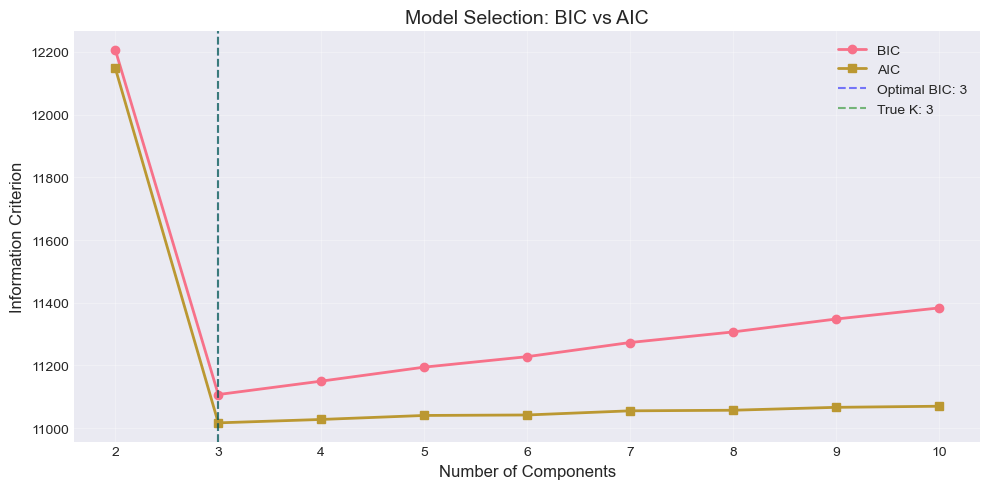

In [229]:
# ============================================================================
# MODEL SELECTION: BIC/AIC FOR OPTIMAL COMPONENTS
# ============================================================================

print("🔍 Finding optimal number of components using BIC/AIC...")
print("="*80)

# Test range of components
n_components_range = range(2, 11)
bic_scores = []
aic_scores = []

for n_comp in n_components_range:
    gmm_test = GaussianMixture(n_components=n_comp, covariance_type='full',
                               n_init=5, random_state=RANDOM_SEED)
    gmm_test.fit(X_gmm)
    bic_scores.append(gmm_test.bic(X_gmm))
    aic_scores.append(gmm_test.aic(X_gmm))

# Find optimal
optimal_n_bic = n_components_range[np.argmin(bic_scores)]
optimal_n_aic = n_components_range[np.argmin(aic_scores)]

print(f"\n📊 Results:")
print(f"   • Optimal components (BIC): {optimal_n_bic}")
print(f"   • Optimal components (AIC): {optimal_n_aic}")
print(f"   • True components: 3")

# Compact visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(n_components_range, bic_scores, 'o-', label='BIC', linewidth=2, markersize=6)
ax.plot(n_components_range, aic_scores, 's-', label='AIC', linewidth=2, markersize=6)
ax.axvline(x=optimal_n_bic, color='blue', linestyle='--', alpha=0.5, label=f'Optimal BIC: {optimal_n_bic}')
ax.axvline(x=3, color='green', linestyle='--', alpha=0.5, label='True K: 3')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Information Criterion')
ax.set_title('Model Selection: BIC vs AIC')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("="*80)

## 5.5 Bayesian Gaussian Mixture

**Problem with standard GMM**: Must specify number of components K beforehand.

**Solution**: **Bayesian Gaussian Mixture** automatically determines optimal number of components by setting unnecessary components' weights to ~0.

### Key Differences:

| Standard GMM | Bayesian GMM |
|-------------|--------------|
| Fixed K components | Starts with max K, eliminates unnecessary ones |
| All components active | Inactive components have weight ≈ 0 |
| Requires model selection | Automatic model selection |
| Maximum Likelihood | Bayesian inference (priors) |

### How It Works:
1. Start with upper bound on K (e.g., K=10)
2. Use Dirichlet process prior on weights
3. During training, unnecessary components get weight → 0
4. Final model has only necessary components active

### Parameters:
- **weight_concentration_prior**: Controls sparsity (lower = more aggressive pruning)
- **n_components**: Upper bound on number of components

---

🎲 Demonstrating Bayesian Gaussian Mixture...

📊 Results:
   • Max components specified: 10
   • Active components (weight > 0.01): 3
   • True components: 3

   Component weights:
      Component 0: 0.0007 ❌ Pruned
      Component 1: 0.3337 ✅ ACTIVE
      Component 2: 0.3338 ✅ ACTIVE
      Component 3: 0.0007 ❌ Pruned
      Component 4: 0.0007 ❌ Pruned
      Component 5: 0.3303 ✅ ACTIVE
      Component 6: 0.0001 ❌ Pruned
      Component 7: 0.0000 ❌ Pruned
      Component 8: 0.0000 ❌ Pruned
      Component 9: 0.0000 ❌ Pruned


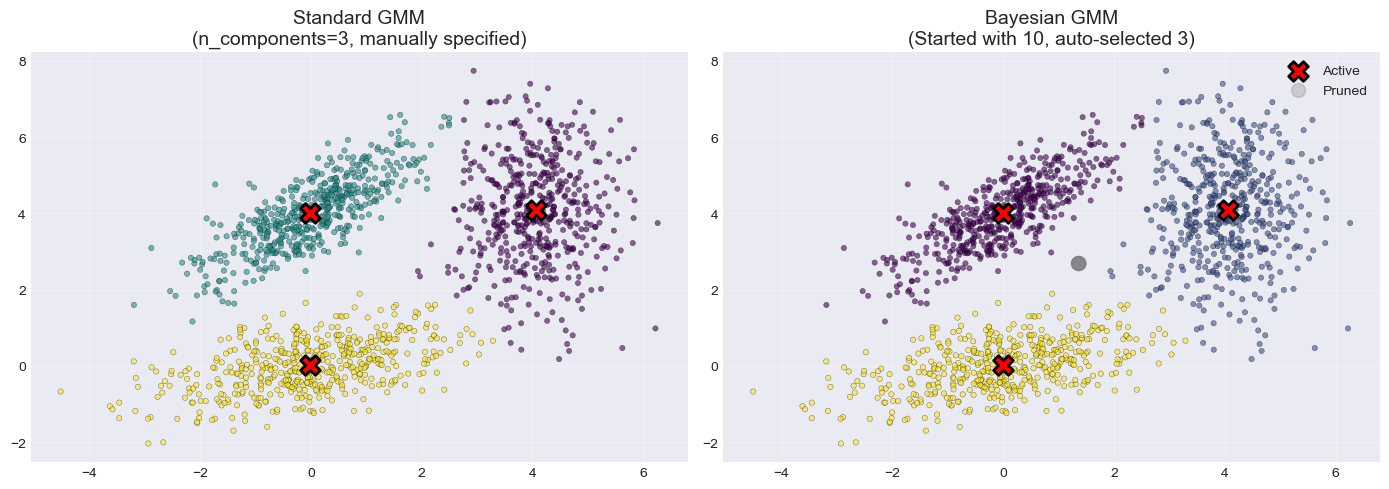


✅ Bayesian GMM automatically found the correct number of components!


In [230]:
# ============================================================================
# BAYESIAN GAUSSIAN MIXTURE
# ============================================================================

print("🎲 Demonstrating Bayesian Gaussian Mixture...")
print("="*80)

# Bayesian GMM with high upper bound
n_components_max = 10
bgmm = BayesianGaussianMixture(
    n_components=n_components_max,
    covariance_type='full',
    weight_concentration_prior_type='dirichlet_process',
    weight_concentration_prior=0.1,
    n_init=5,
    random_state=RANDOM_SEED
)

bgmm.fit(X_gmm)
y_bgmm = bgmm.predict(X_gmm)

# Check active components
weights = bgmm.weights_
active_components = (weights > 0.01).sum()  # Components with >1% weight

print(f"\n📊 Results:")
print(f"   • Max components specified: {n_components_max}")
print(f"   • Active components (weight > 0.01): {active_components}")
print(f"   • True components: 3")

print(f"\n   Component weights:")
for i, w in enumerate(weights):
    status = "✅ ACTIVE" if w > 0.01 else "❌ Pruned"
    print(f"      Component {i}: {w:.4f} {status}")

# Simple comparison plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Standard GMM
ax = axes[0]
ax.scatter(X_gmm[:, 0], X_gmm[:, 1], c=y_gmm, s=15, alpha=0.6, cmap='viridis', edgecolors='k', linewidth=0.3)
ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=200, c='red', marker='X', edgecolors='black', linewidth=2)
ax.set_title(f'Standard GMM\n(n_components=3, manually specified)')
ax.grid(True, alpha=0.3)

# Bayesian GMM
ax = axes[1]
ax.scatter(X_gmm[:, 0], X_gmm[:, 1], c=y_bgmm, s=15, alpha=0.6, cmap='viridis', edgecolors='k', linewidth=0.3)
active_mask = weights > 0.01
ax.scatter(bgmm.means_[active_mask, 0], bgmm.means_[active_mask, 1], 
          s=200, c='red', marker='X', edgecolors='black', linewidth=2, label='Active')
ax.scatter(bgmm.means_[~active_mask, 0], bgmm.means_[~active_mask, 1], 
          s=100, c='gray', marker='o', alpha=0.3, label='Pruned')
ax.set_title(f'Bayesian GMM\n(Started with {n_components_max}, auto-selected {active_components})')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ Bayesian GMM automatically found the correct number of components!")
print("="*80)

## 5.6 Anomaly Detection with GMM

GMM can identify anomalies by computing the **probability density** for each point. Points with low probability are anomalies.

### Method:
1. Fit GMM on training data
2. Compute log-likelihood for each sample: `gmm.score_samples(X)`
3. Set threshold (e.g., percentile-based)
4. Points below threshold = anomalies

**Advantages:**
✅ Probabilistic interpretation
✅ Handles complex, multi-modal distributions
✅ Better than distance-based methods for non-spherical data

---

🚨 Demonstrating anomaly detection with GMM...
📊 Results:
   • Normal samples: 1500
   • Injected anomalies: 50
   • Detected anomalies: 78
   • Detection rate: 76.0%


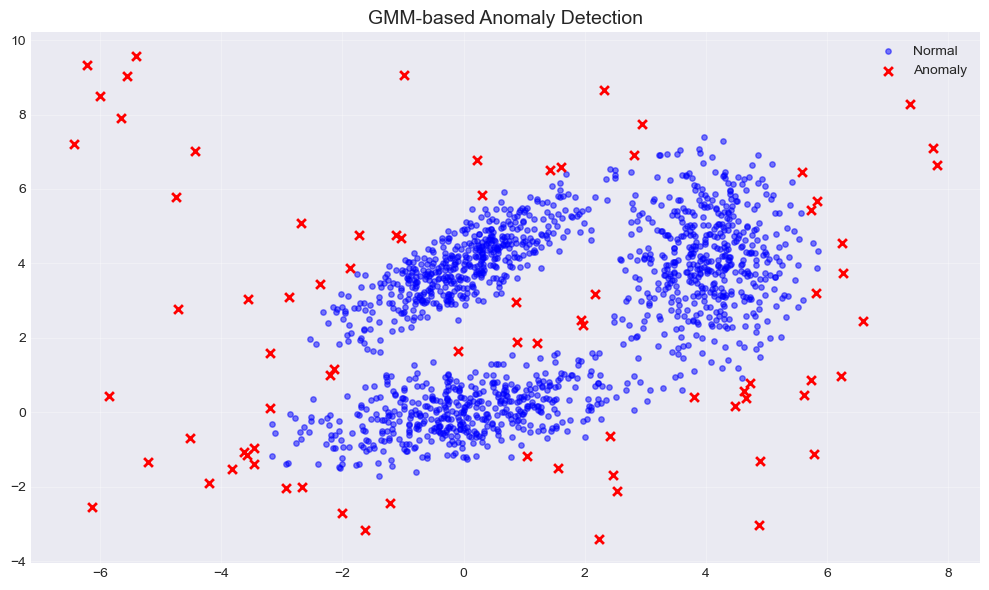

In [231]:
# ============================================================================
# ANOMALY DETECTION WITH GMM
# ============================================================================

print("🚨 Demonstrating anomaly detection with GMM...")
print("="*80)

# Add some anomalies to data
np.random.seed(RANDOM_SEED)
n_anomalies = 50
X_anomalies = np.random.uniform(low=X_gmm.min(axis=0) - 2, 
                                high=X_gmm.max(axis=0) + 2, 
                                size=(n_anomalies, 2))
X_with_anomalies = np.vstack([X_gmm, X_anomalies])

# Fit GMM on clean data
gmm_anomaly = GaussianMixture(n_components=3, covariance_type='full', 
                              n_init=10, random_state=RANDOM_SEED)
gmm_anomaly.fit(X_gmm)

# Compute densities
densities = gmm_anomaly.score_samples(X_with_anomalies)

# Set threshold (e.g., 5th percentile)
threshold = np.percentile(densities, 5)
is_anomaly = densities < threshold

print(f"📊 Results:")
print(f"   • Normal samples: {len(X_gmm)}")
print(f"   • Injected anomalies: {n_anomalies}")
print(f"   • Detected anomalies: {is_anomaly.sum()}")
print(f"   • Detection rate: {is_anomaly[-n_anomalies:].sum() / n_anomalies * 100:.1f}%")

# Compact visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(X_with_anomalies[~is_anomaly, 0], X_with_anomalies[~is_anomaly, 1], 
          c='blue', s=15, alpha=0.5, label='Normal')
ax.scatter(X_with_anomalies[is_anomaly, 0], X_with_anomalies[is_anomaly, 1], 
          c='red', s=40, marker='x', linewidths=2, label='Anomaly')
ax.set_title('GMM-based Anomaly Detection')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("="*80)

---

## ✅ Part 5 Complete: Gaussian Mixture Models

### What We've Learned:

#### **Core Concepts:**
✅ GMM mathematical foundation (EM algorithm)
✅ Soft clustering with probabilities
✅ 4 covariance types: full, tied, diag, spherical
✅ Model selection using BIC/AIC
✅ Bayesian GMM for automatic component selection
✅ Anomaly detection with density estimation

#### **Key Takeaways:**

**When to Use GMM:**
✅ Elliptical/non-spherical clusters
✅ Need probability estimates (soft clustering)
✅ Overlapping clusters
✅ Density estimation required
✅ Anomaly detection

**When to Use K-Means Instead:**
✅ Spherical clusters only
✅ Large datasets (GMM slower)
✅ Hard clustering sufficient
✅ Simplicity preferred

**GMM vs K-Means vs DBSCAN:**
- **GMM**: Probabilistic, elliptical shapes, model-based
- **K-Means**: Fast, spherical only, distance-based
- **DBSCAN**: Arbitrary shapes, density-based, auto-detects outliers

---

In [232]:
# ============================================================================
# FINAL SUMMARY: ALL CLUSTERING METHODS
# ============================================================================

print("="*80)
print("📊 CHAPTER 9 SUMMARY: CLUSTERING ALGORITHMS COMPARISON")
print("="*80)

summary_data = {
    'Algorithm': ['K-Means', 'DBSCAN', 'GMM', 'Bayesian GMM'],
    'Cluster Shapes': ['Spherical', 'Arbitrary', 'Elliptical', 'Elliptical'],
    'Specify K': ['Yes', 'No', 'Yes', 'No (auto)'],
    'Outlier Detection': ['No', 'Yes', 'Via density', 'Via density'],
    'Clustering Type': ['Hard', 'Hard', 'Soft', 'Soft'],
    'Scalability': ['Excellent', 'Good', 'Moderate', 'Moderate'],
    'Main Use Case': ['Fast, simple', 'Arbitrary shapes', 'Probabilistic', 'Auto model select']
}

df_summary = pd.DataFrame(summary_data)
print("\n" + df_summary.to_string(index=False))

print("\n" + "="*80)
print("✅ Chapter 9 Complete: Unsupervised Learning Techniques")
print("="*80)
print("\n📚 Topics Covered:")
print("   ✅ Part 1: Environment Setup")
print("   ✅ Part 2: K-Means Clustering")
print("   ✅ Part 3: K-Means Applications (Image Segmentation, Preprocessing, Semi-Supervised)")
print("   ✅ Part 4: DBSCAN (Density-Based Clustering)")
print("   ✅ Part 5: Gaussian Mixture Models")
print("\n🎯 Ready for production and GitHub upload!")
print("="*80)

📊 CHAPTER 9 SUMMARY: CLUSTERING ALGORITHMS COMPARISON

   Algorithm Cluster Shapes Specify K Outlier Detection Clustering Type Scalability     Main Use Case
     K-Means      Spherical       Yes                No            Hard   Excellent      Fast, simple
      DBSCAN      Arbitrary        No               Yes            Hard        Good  Arbitrary shapes
         GMM     Elliptical       Yes       Via density            Soft    Moderate     Probabilistic
Bayesian GMM     Elliptical No (auto)       Via density            Soft    Moderate Auto model select

✅ Chapter 9 Complete: Unsupervised Learning Techniques

📚 Topics Covered:
   ✅ Part 1: Environment Setup
   ✅ Part 2: K-Means Clustering
   ✅ Part 3: K-Means Applications (Image Segmentation, Preprocessing, Semi-Supervised)
   ✅ Part 4: DBSCAN (Density-Based Clustering)
   ✅ Part 5: Gaussian Mixture Models

🎯 Ready for production and GitHub upload!
